In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
import anndata
import scvi
import scanpy as sc
import re
from scipy import sparse
import scanpy.external as sce


Global seed set to 0
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
cur_dir = "/well/immune-rep/users/vbw431/Projects/Peppa/data/DIMITRA_FASTQ/"
work_dir = "/well/immune-rep/users/vbw431/Projects/Peppa/"
out_dir = "/well/immune-rep/users/vbw431/Projects/Peppa/out/"
new_out_dir = "/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/"
plot_dir = "/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/out/plots/"

references = "/well/immune-rep/users/vbw431/reference/reference/refdata-gex-GRCh38-2020-A/"


In [3]:
##load data 
file_list = []
for file in os.listdir(new_out_dir):
    if file.endswith("pre_QC.h5ad"):
        file_list.append(os.path.join(new_out_dir, file)) 
        
file_list

['/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HIVHBV_C_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HH_Tre_4_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/Healthy_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HBV_Tre_1_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HIVHBV_Tre_5_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HBV_Tre_3_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HBV_X2_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HBV_C_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HIVHBV_X2_peppa10x_full_pre_QC.h5ad',
 '/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/HBV_Tre_2_peppa1

In [4]:
adata_list = []
for file in file_list:
    adata_list.append(sc.read_h5ad(file))
    

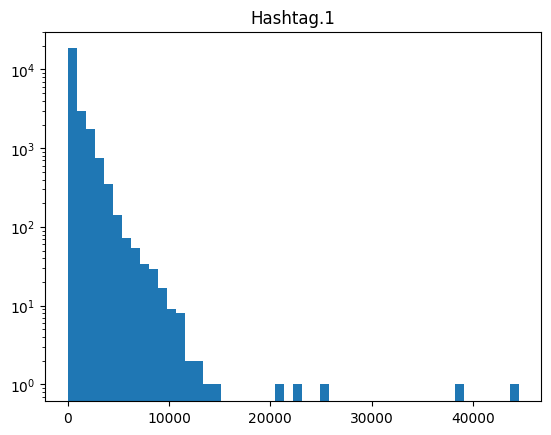

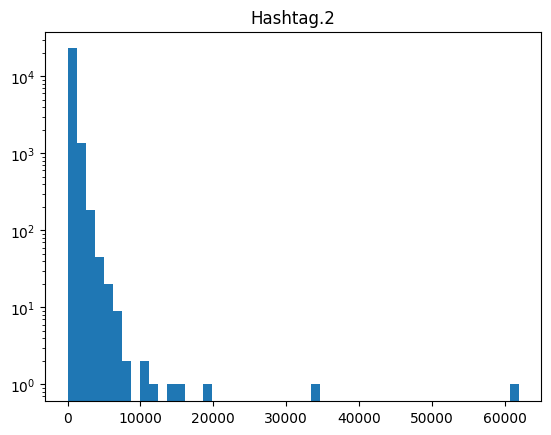

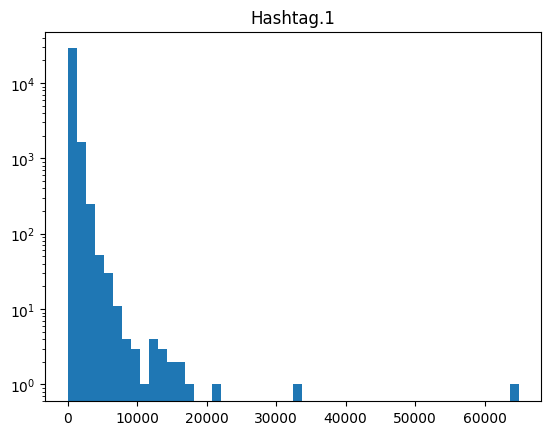

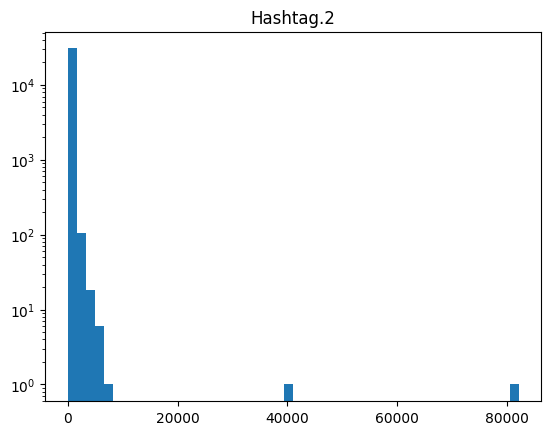

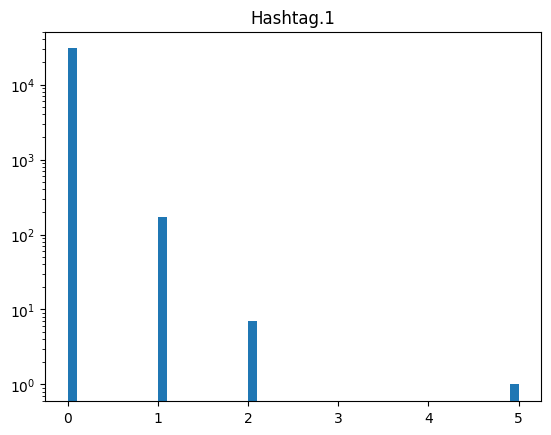

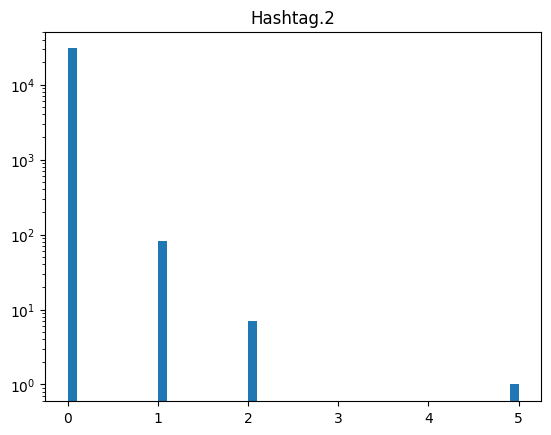

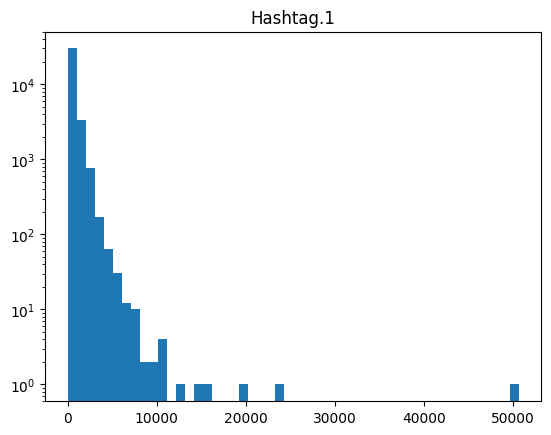

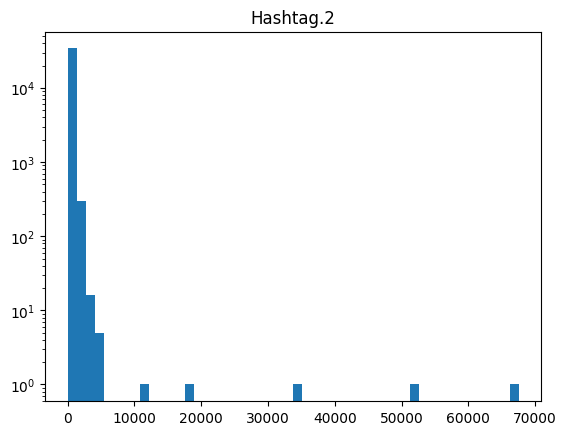

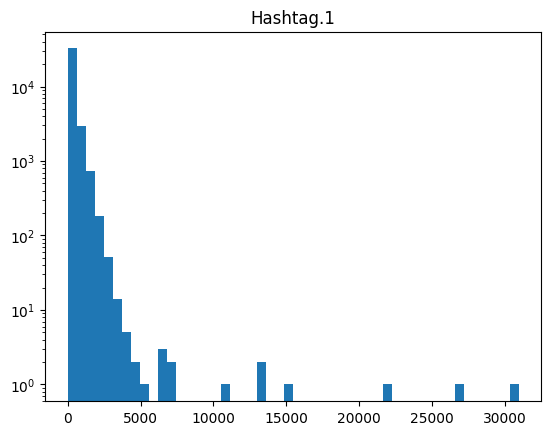

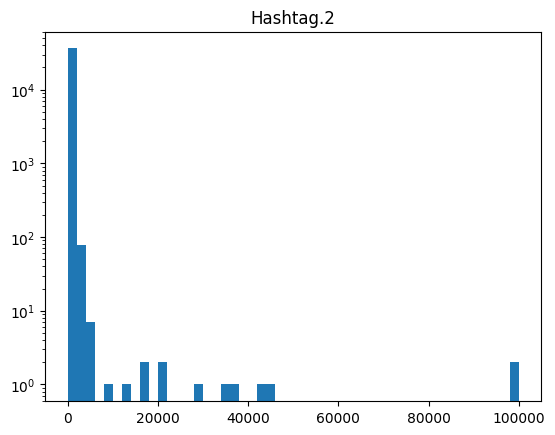

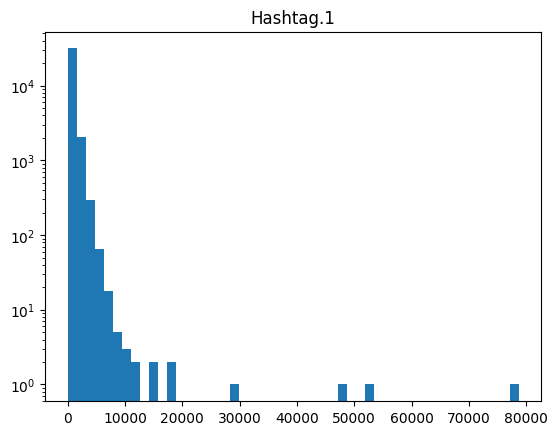

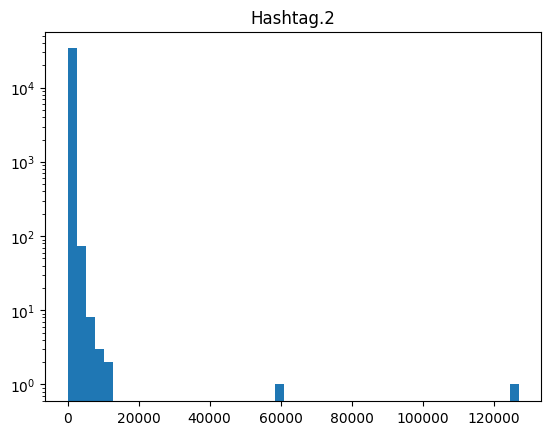

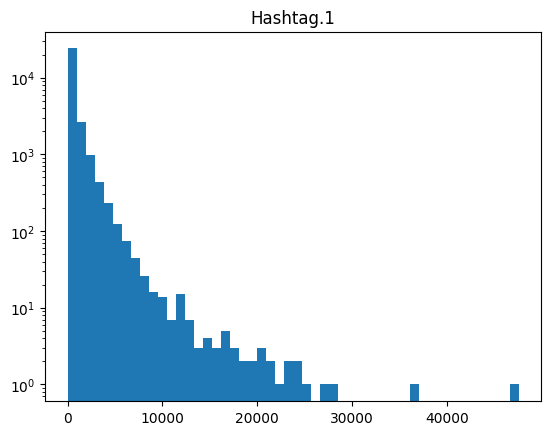

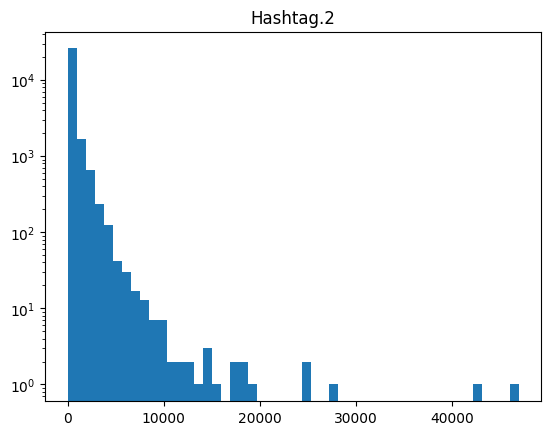

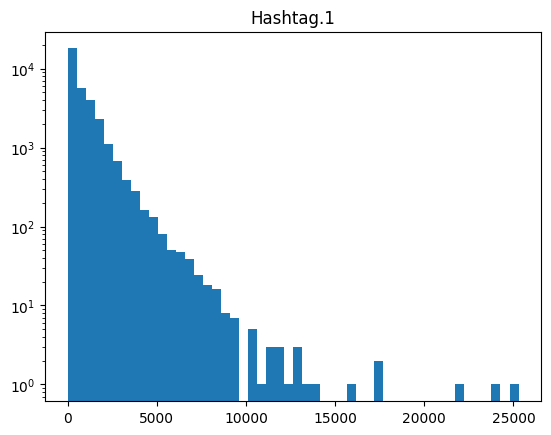

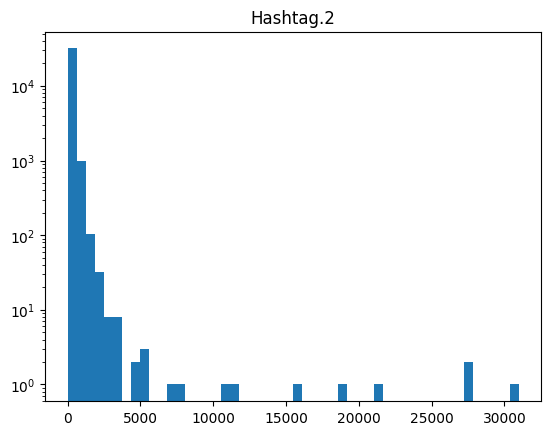

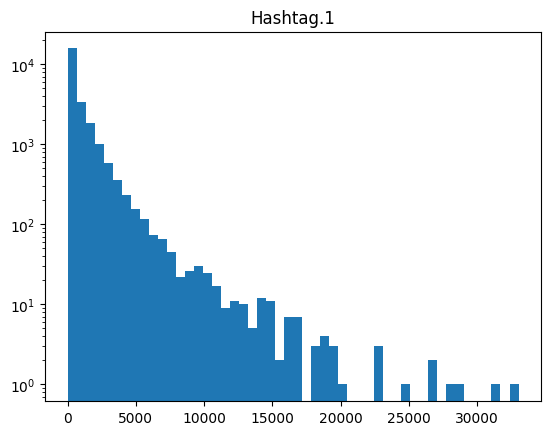

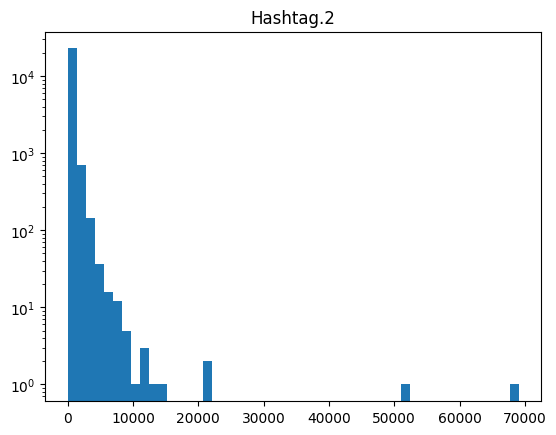

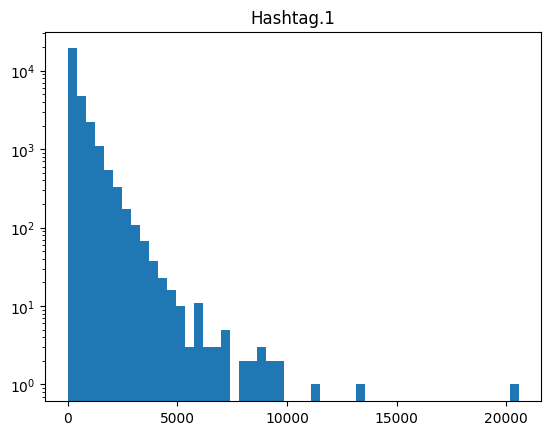

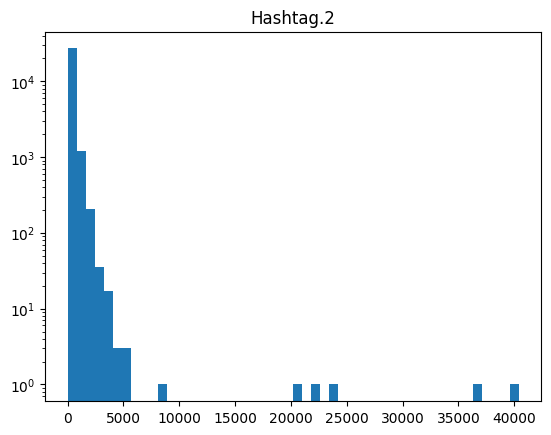

In [5]:
##check distribution of hash

for file in adata_list:
    with plt.rc_context():
            plt.hist(file.obs['Hashtag.1'], bins=50, log=True)
            plt.title('Hashtag.1')
    plt.show()
    
    with plt.rc_context():
            plt.hist(file.obs['Hashtag.2'], bins=50, log=True)
            plt.title('Hashtag.2')
    plt.show()

## Perform QC prior to deconvolution with Hashsolo

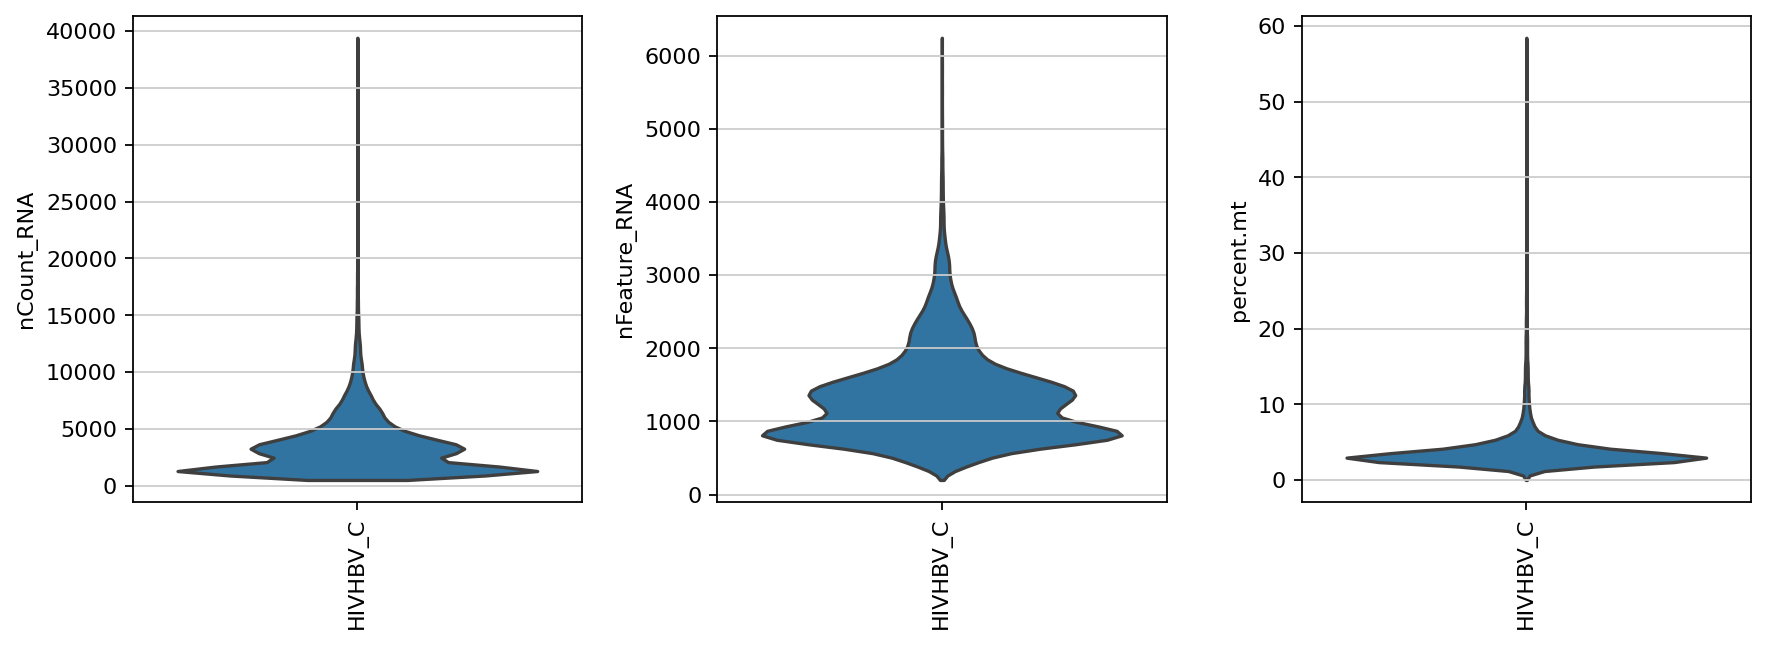

<Figure size 320x320 with 0 Axes>

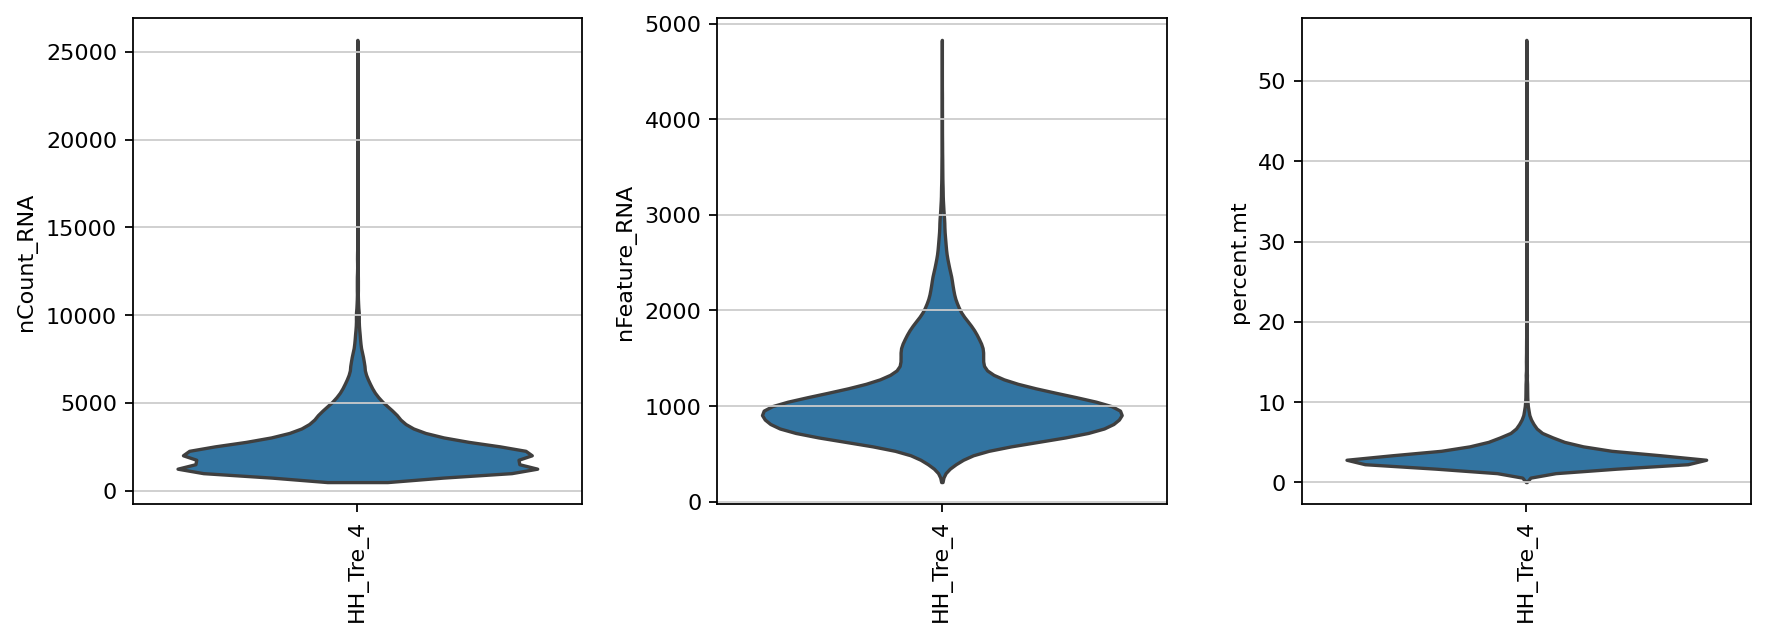

<Figure size 320x320 with 0 Axes>

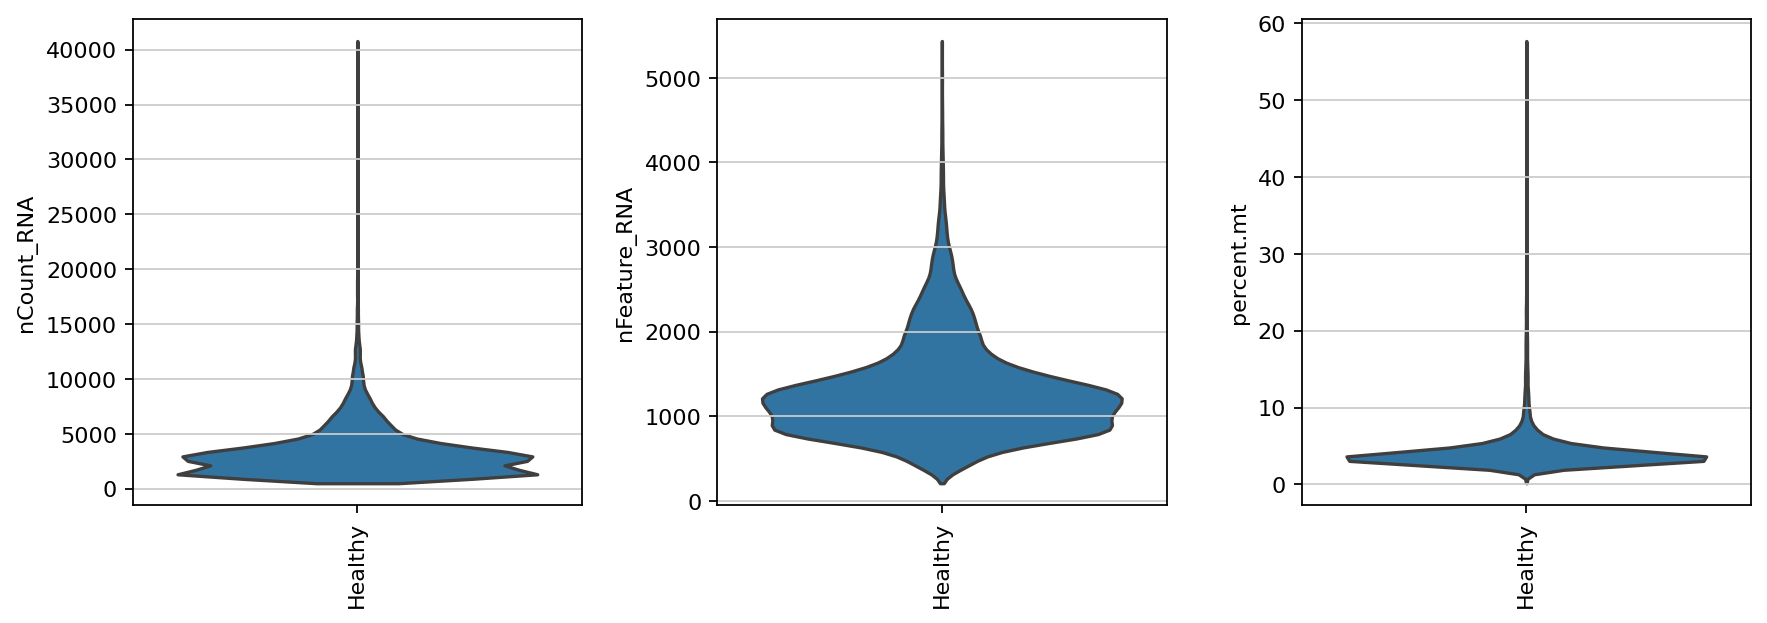

<Figure size 320x320 with 0 Axes>

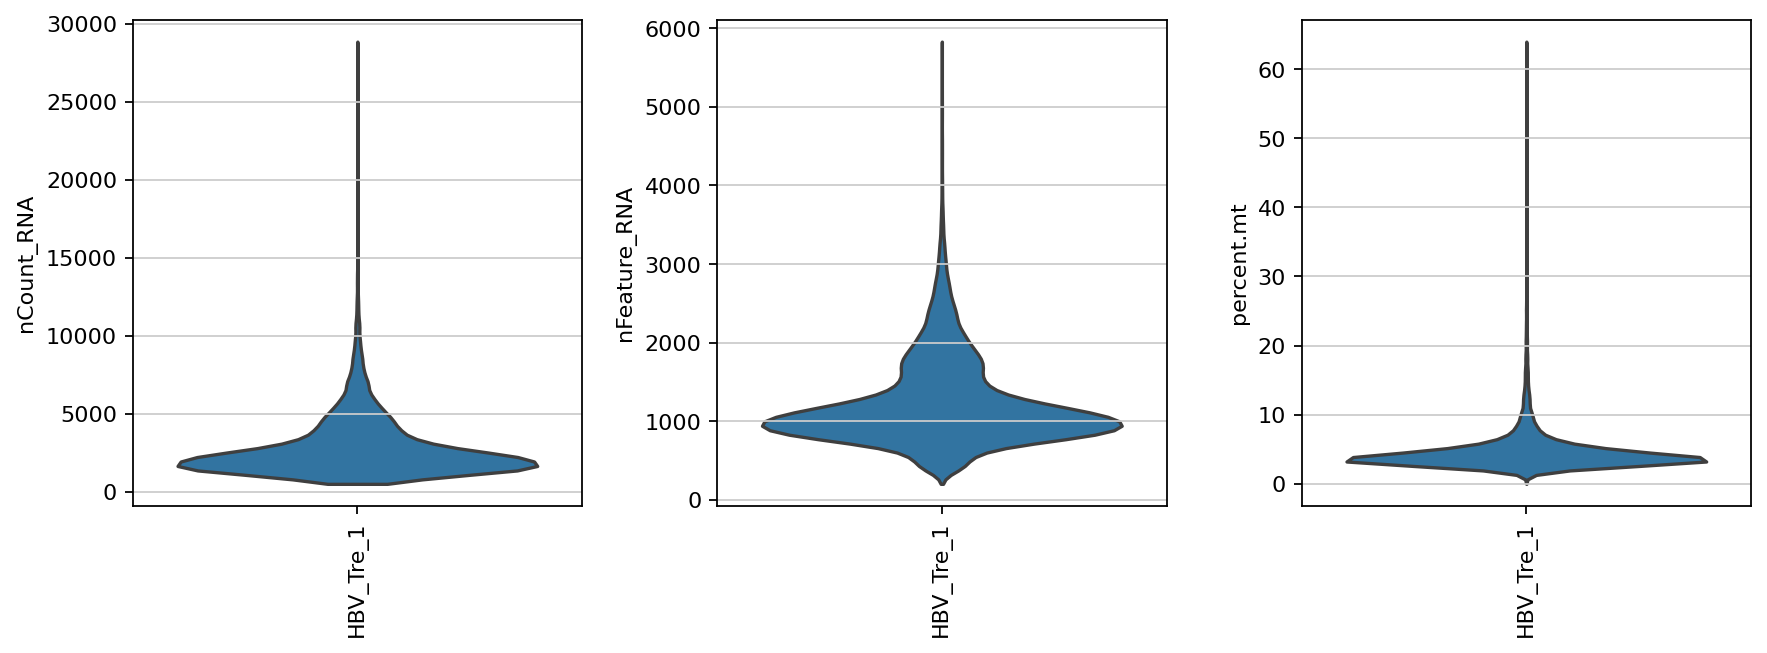

<Figure size 320x320 with 0 Axes>

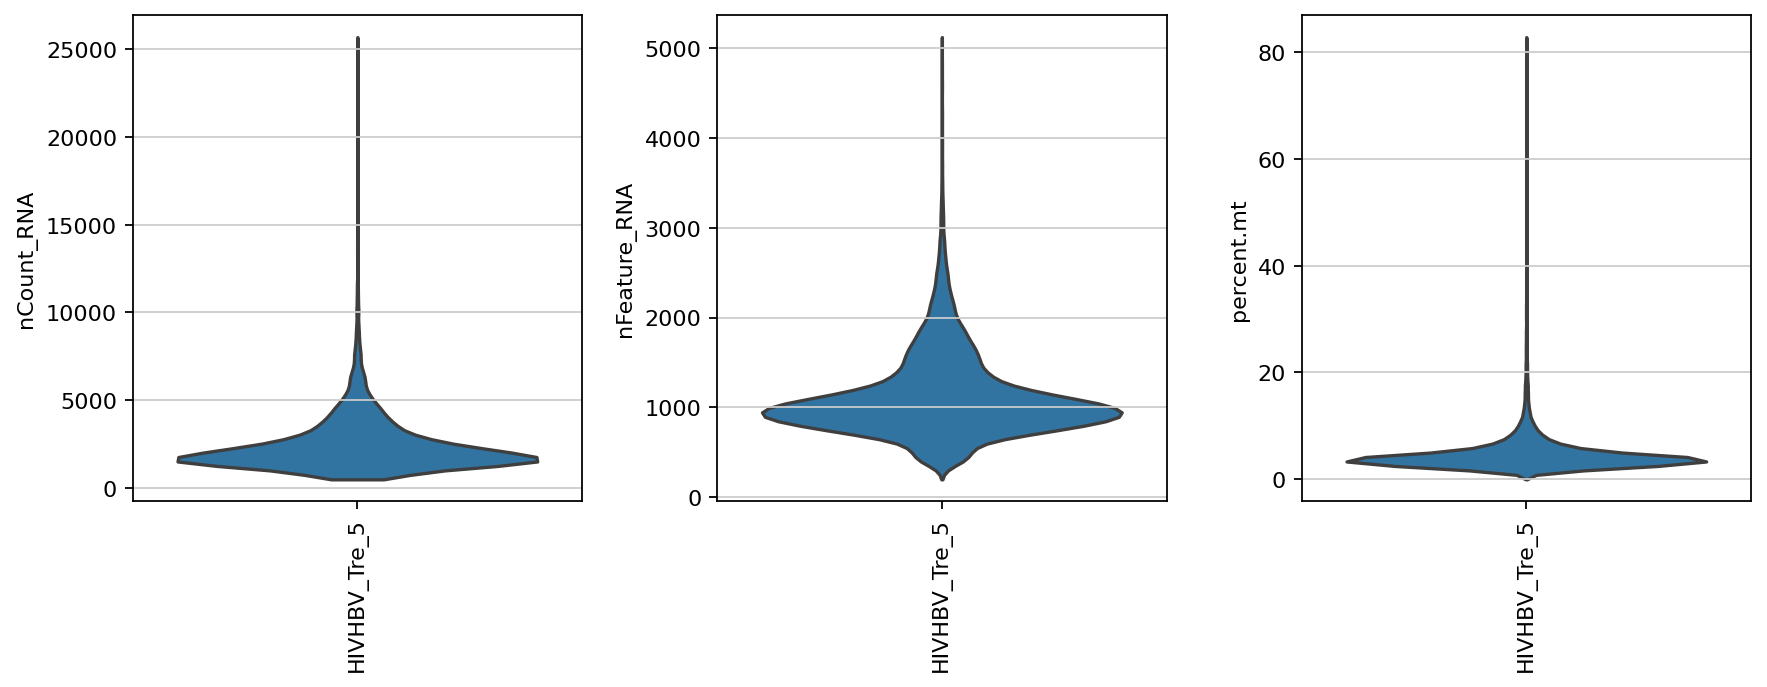

<Figure size 320x320 with 0 Axes>

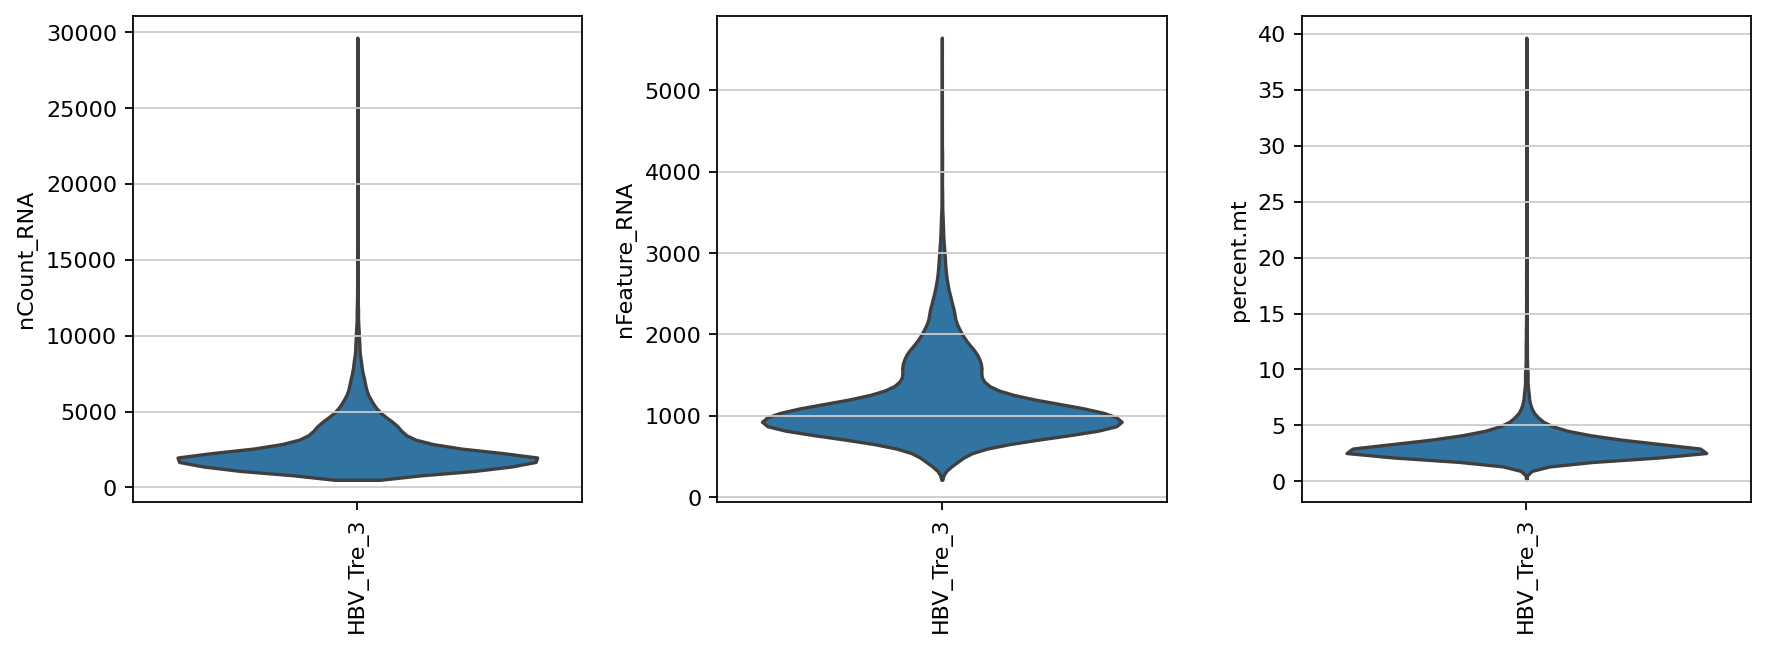

<Figure size 320x320 with 0 Axes>

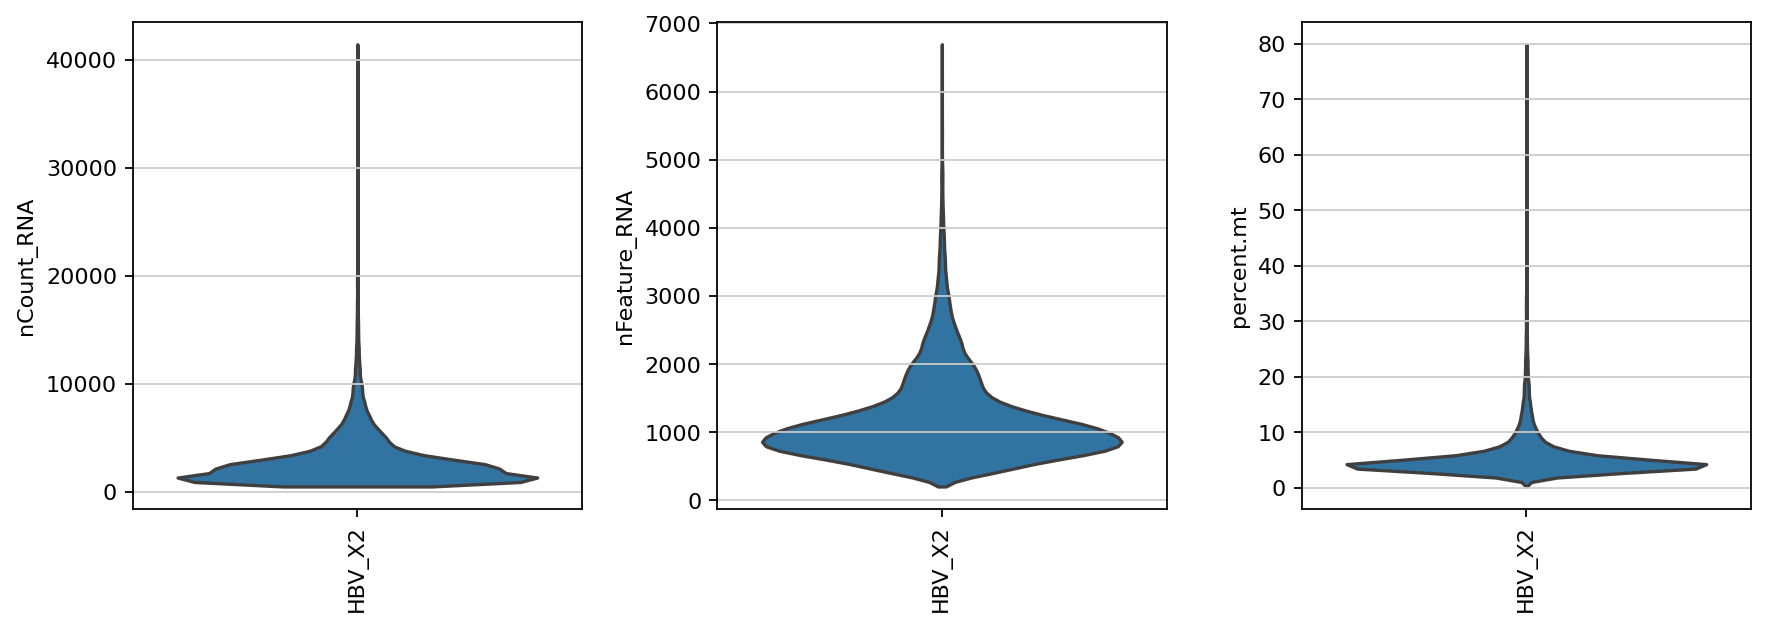

<Figure size 320x320 with 0 Axes>

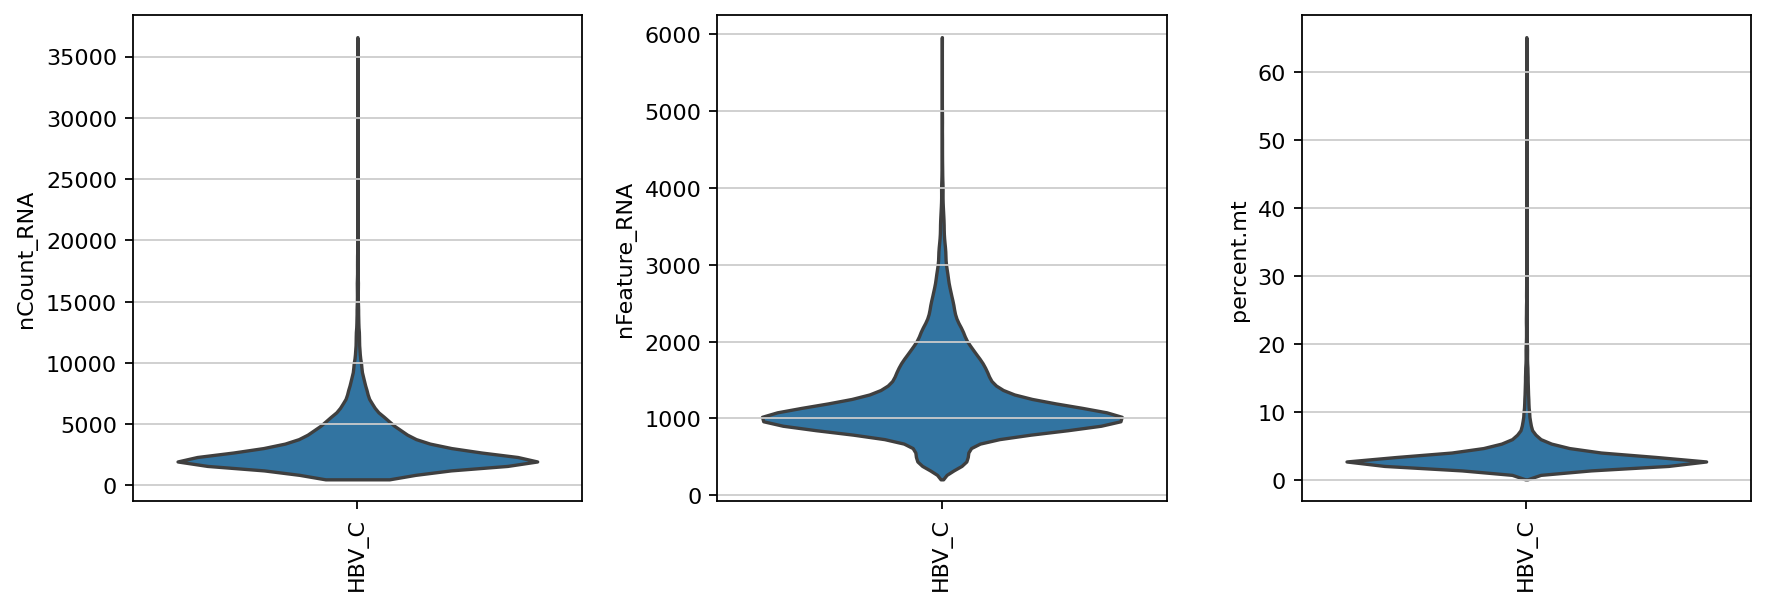

<Figure size 320x320 with 0 Axes>

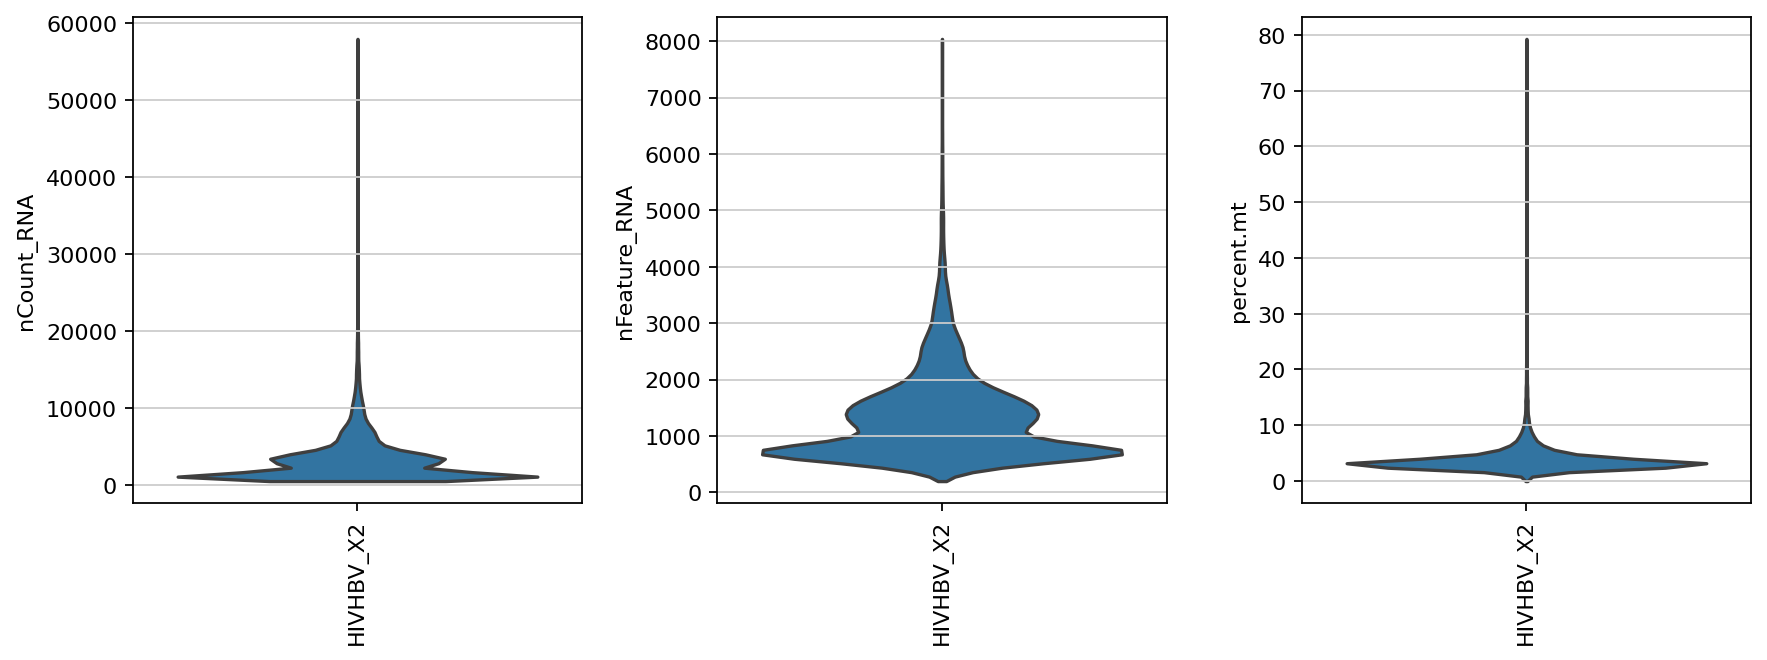

<Figure size 320x320 with 0 Axes>

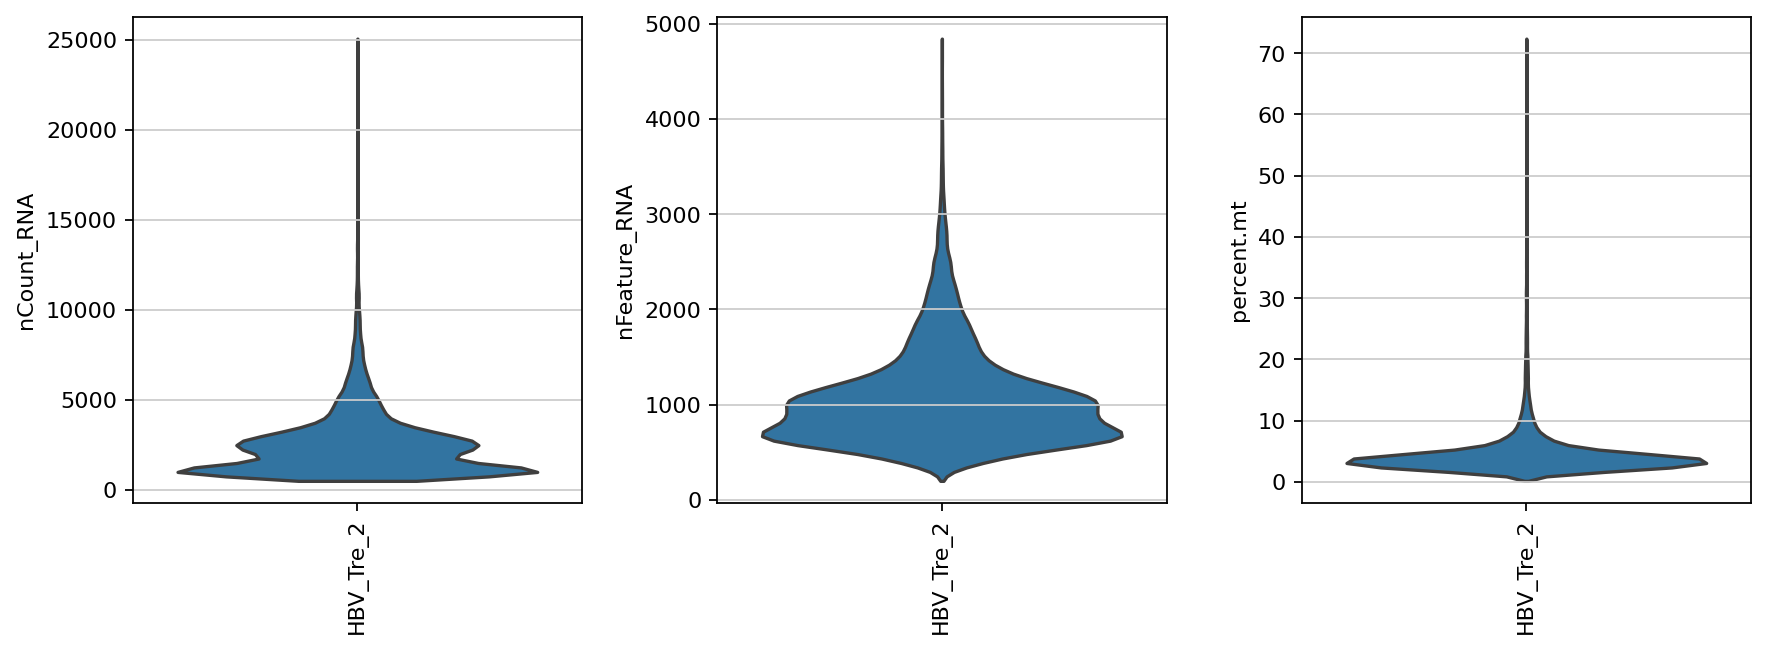

In [6]:
for i in adata_list:
    with plt.rc_context():
        sc.set_figure_params(scanpy=True, fontsize=10)
        sc.pl.violin(i, ['nCount_RNA', 'nFeature_RNA', 'percent.mt'],groupby='sample_ID',
               stripplot=False,multi_panel=True, rotation=90, ncol=1)
        plt.savefig(plot_dir+ np.array2string(np.unique(set(i.obs["sample_ID"].astype(str)))) +"QC_violin.png", bbox_inches="tight", dpi=400)



<Figure size 320x320 with 0 Axes>

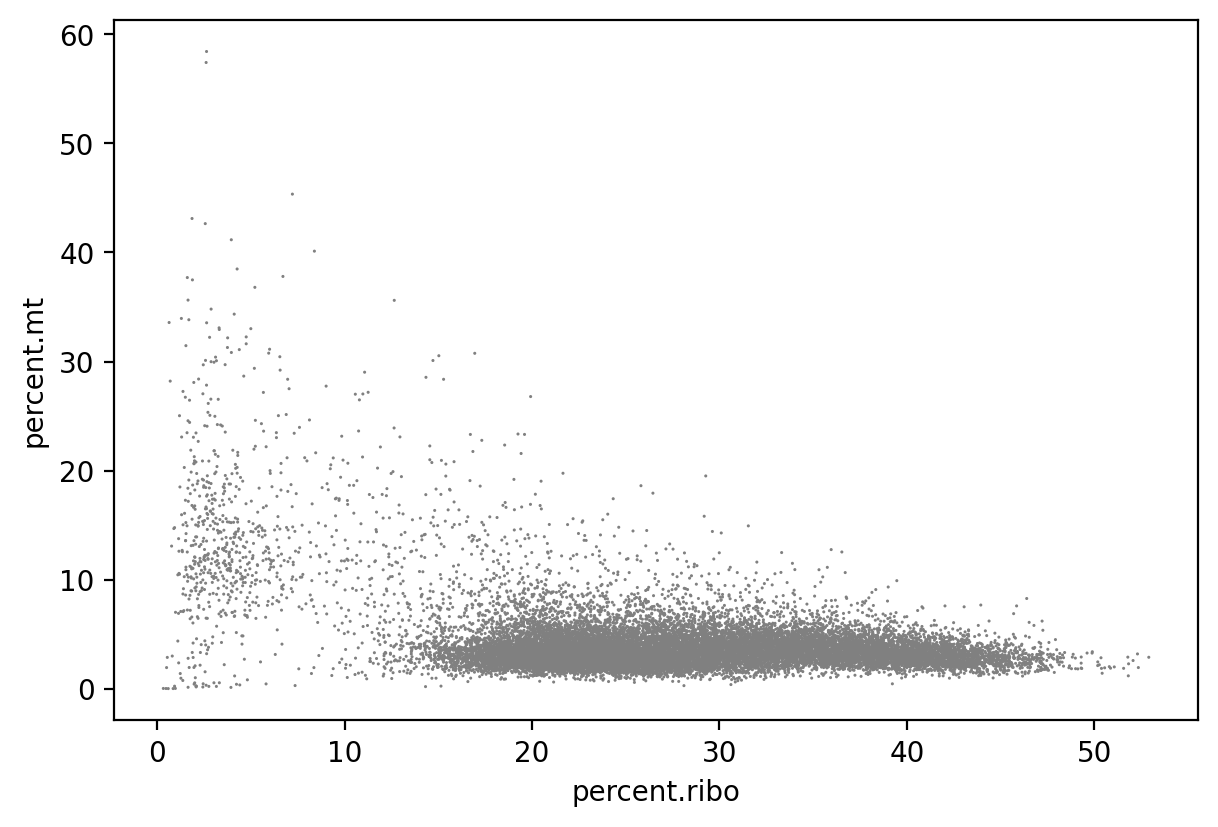

<Figure size 640x480 with 0 Axes>

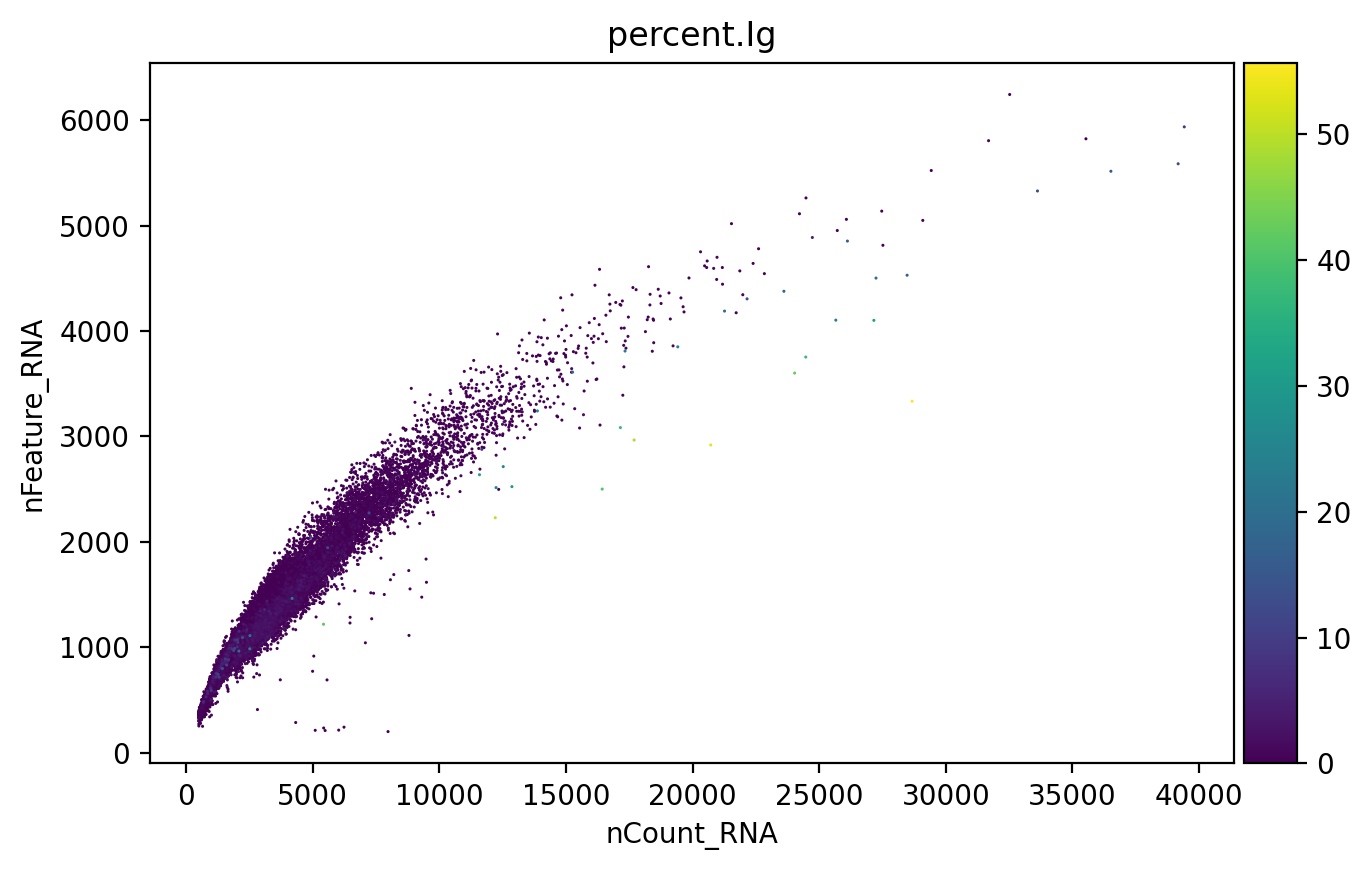

<Figure size 640x480 with 0 Axes>

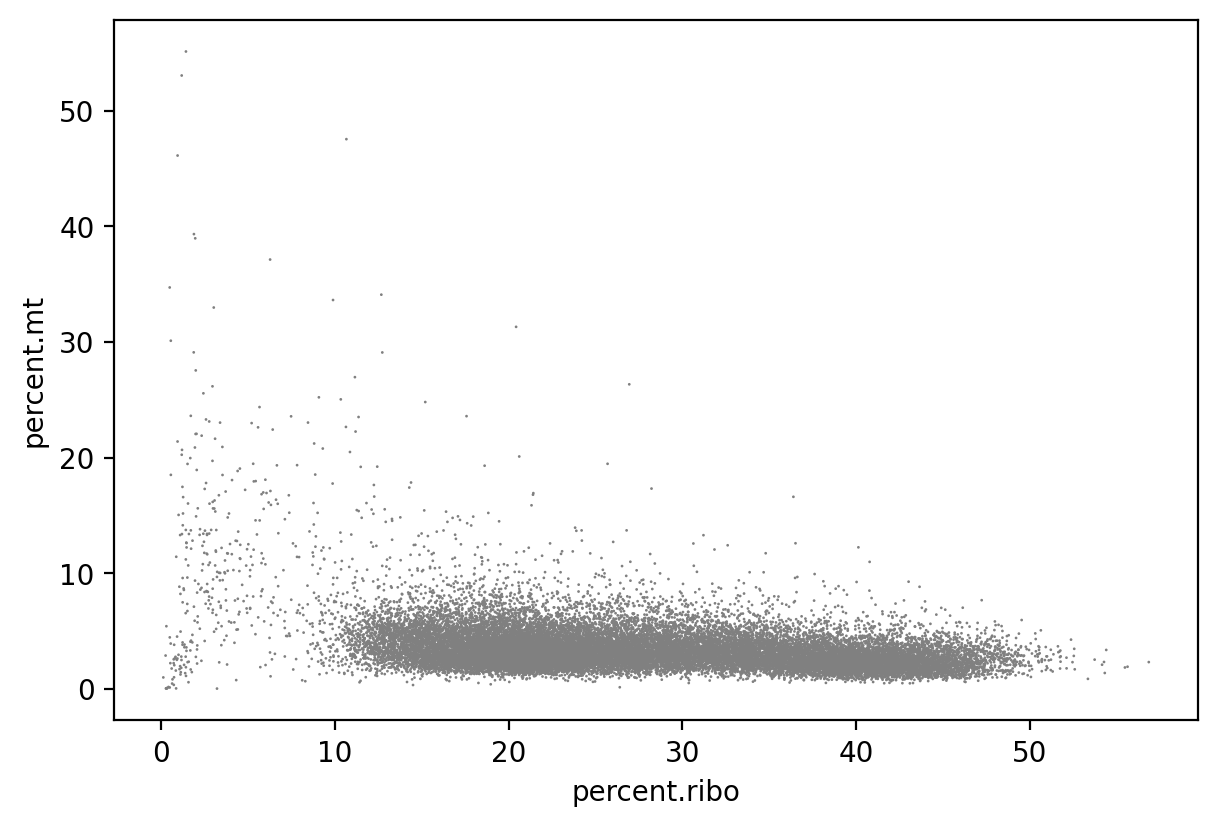

<Figure size 640x480 with 0 Axes>

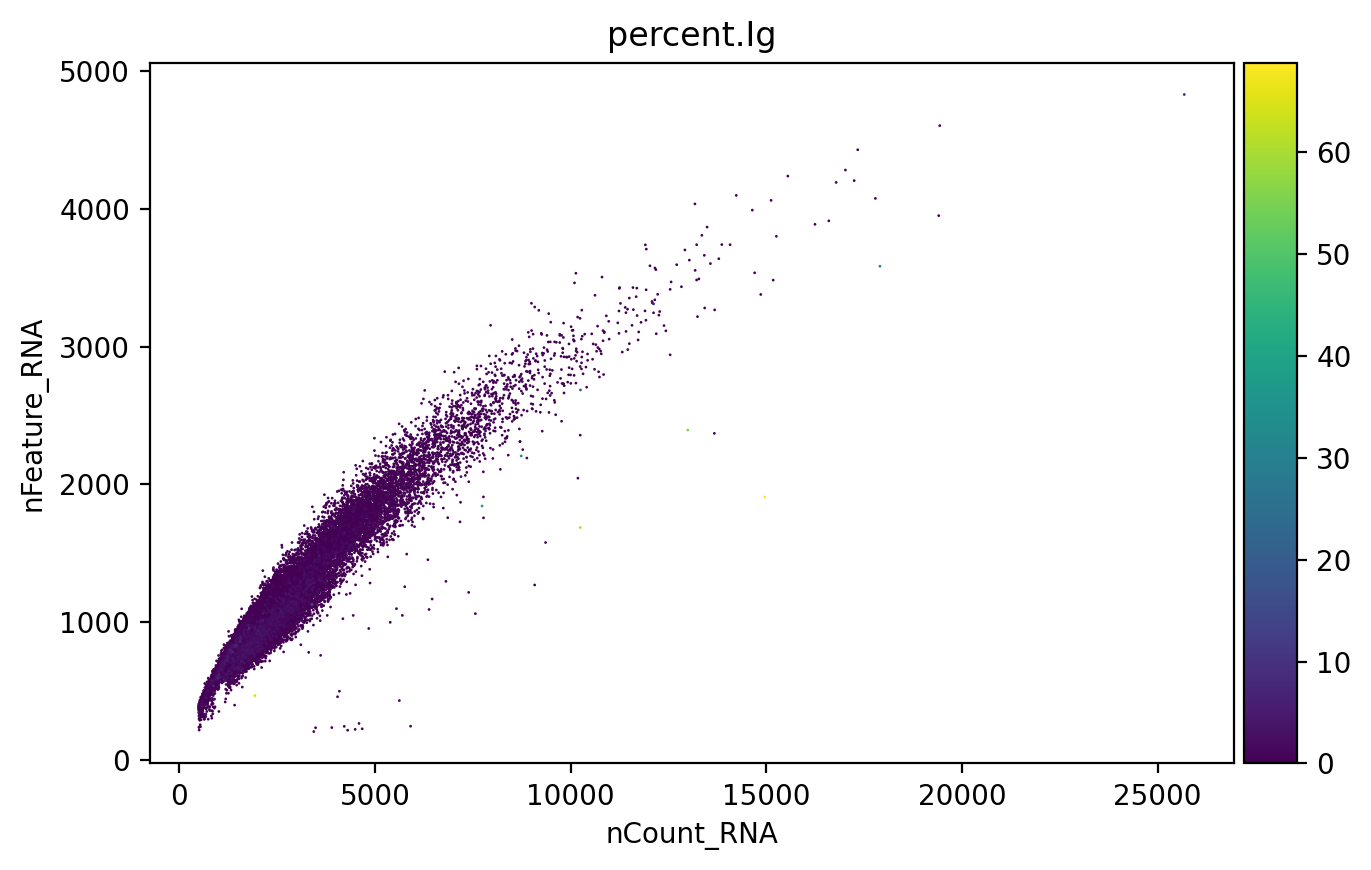

<Figure size 640x480 with 0 Axes>

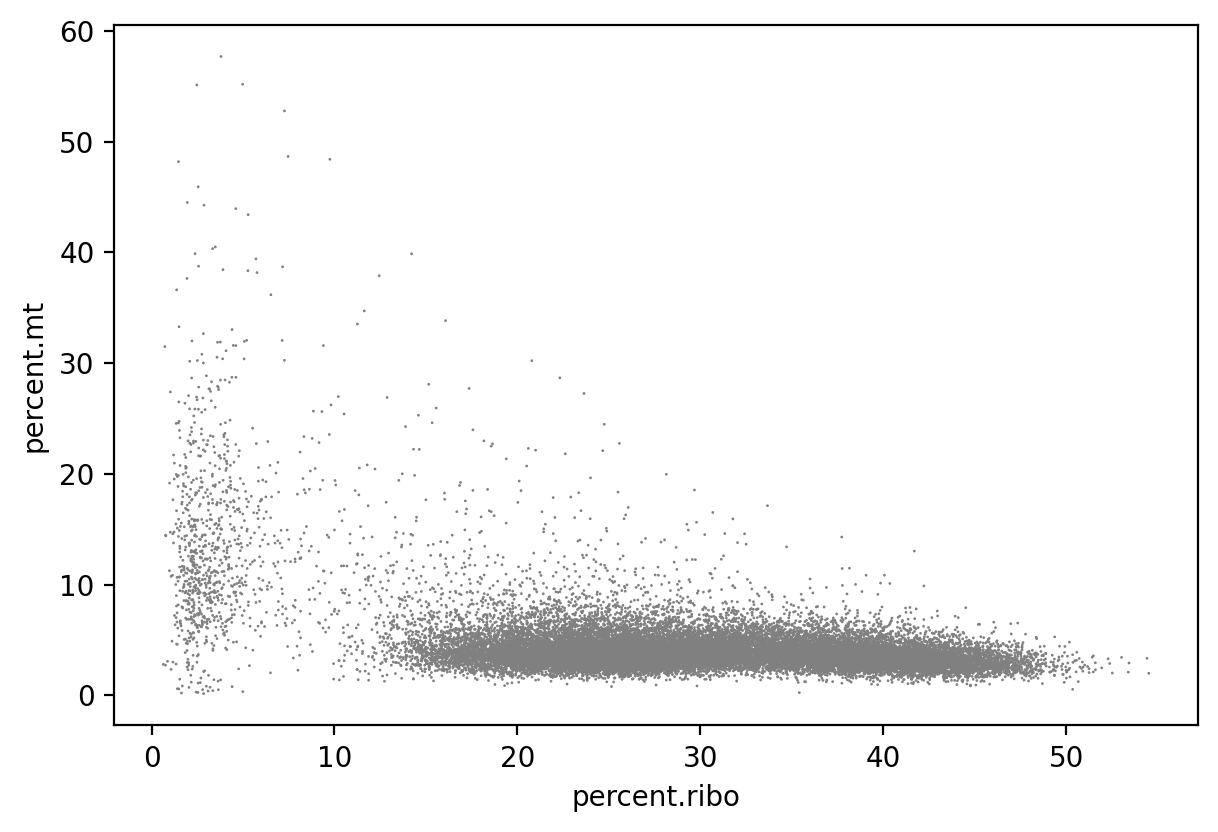

<Figure size 640x480 with 0 Axes>

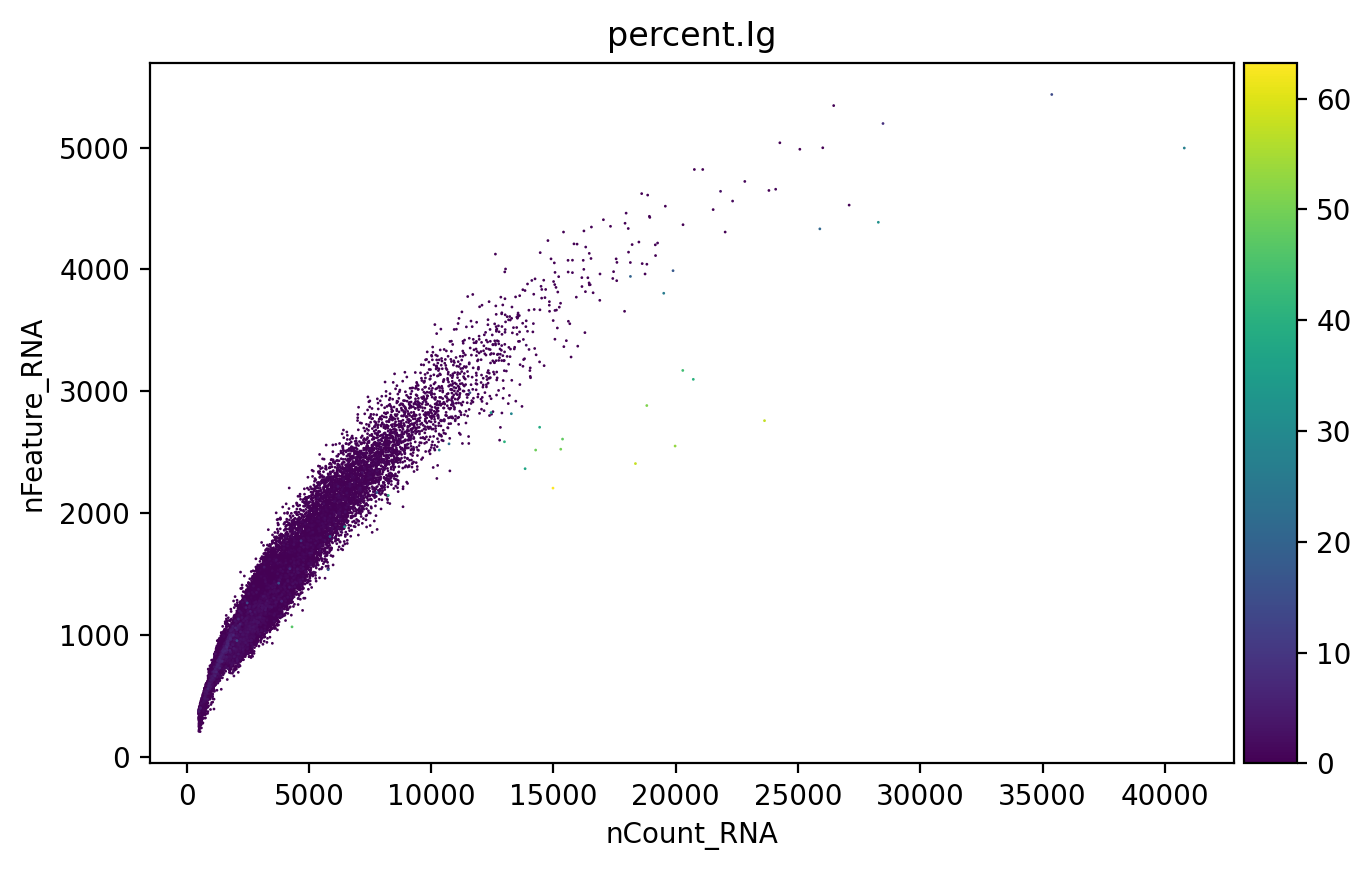

<Figure size 640x480 with 0 Axes>

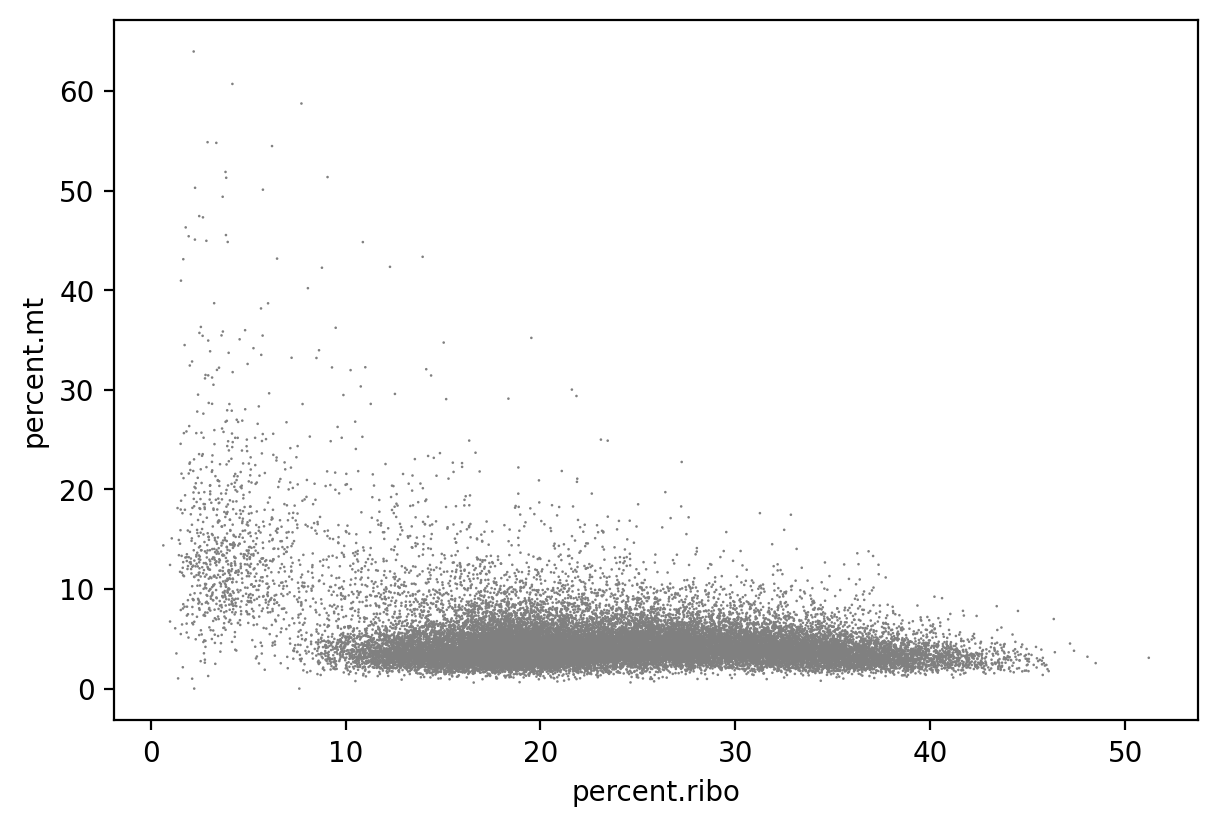

<Figure size 640x480 with 0 Axes>

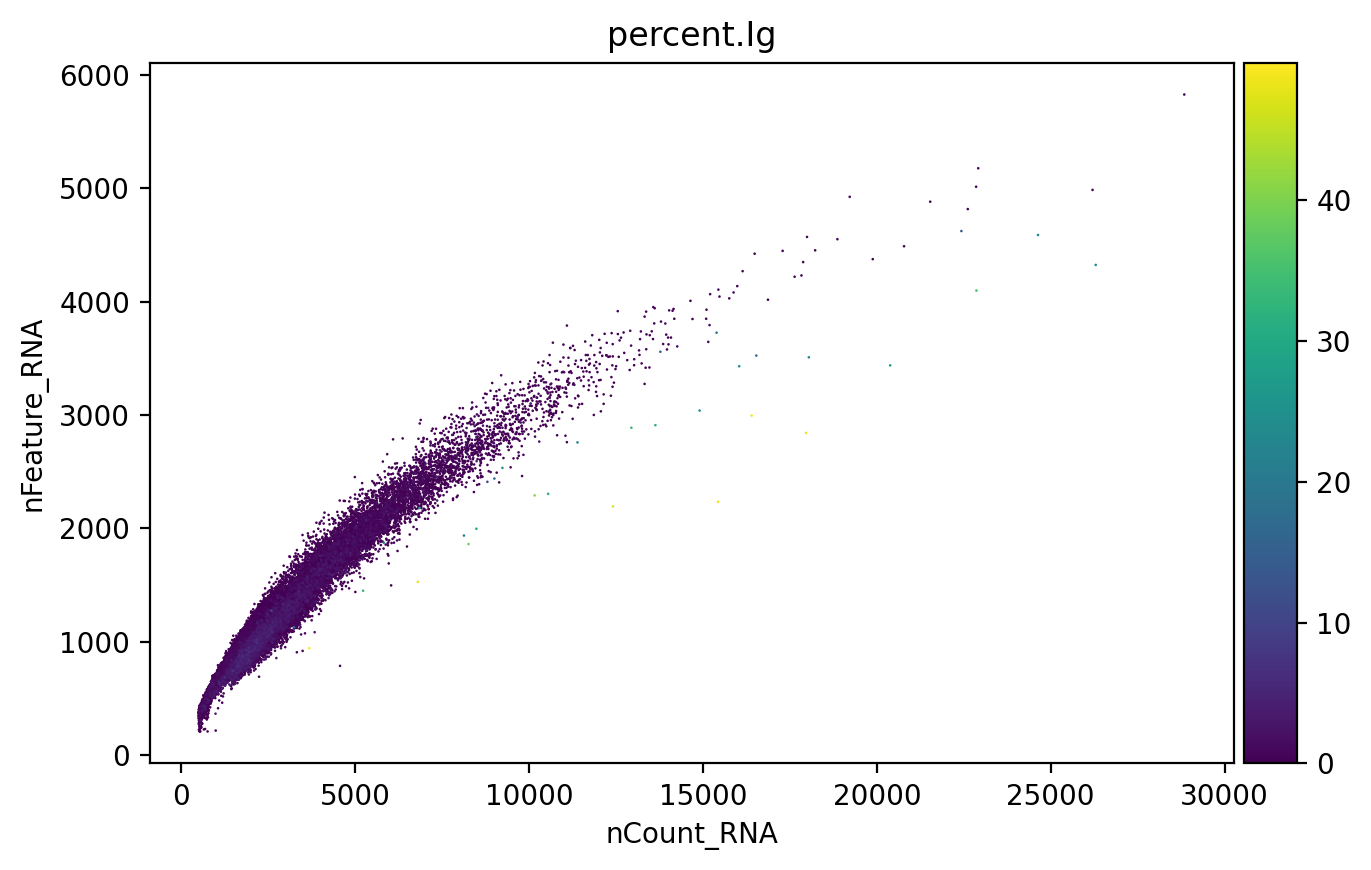

<Figure size 640x480 with 0 Axes>

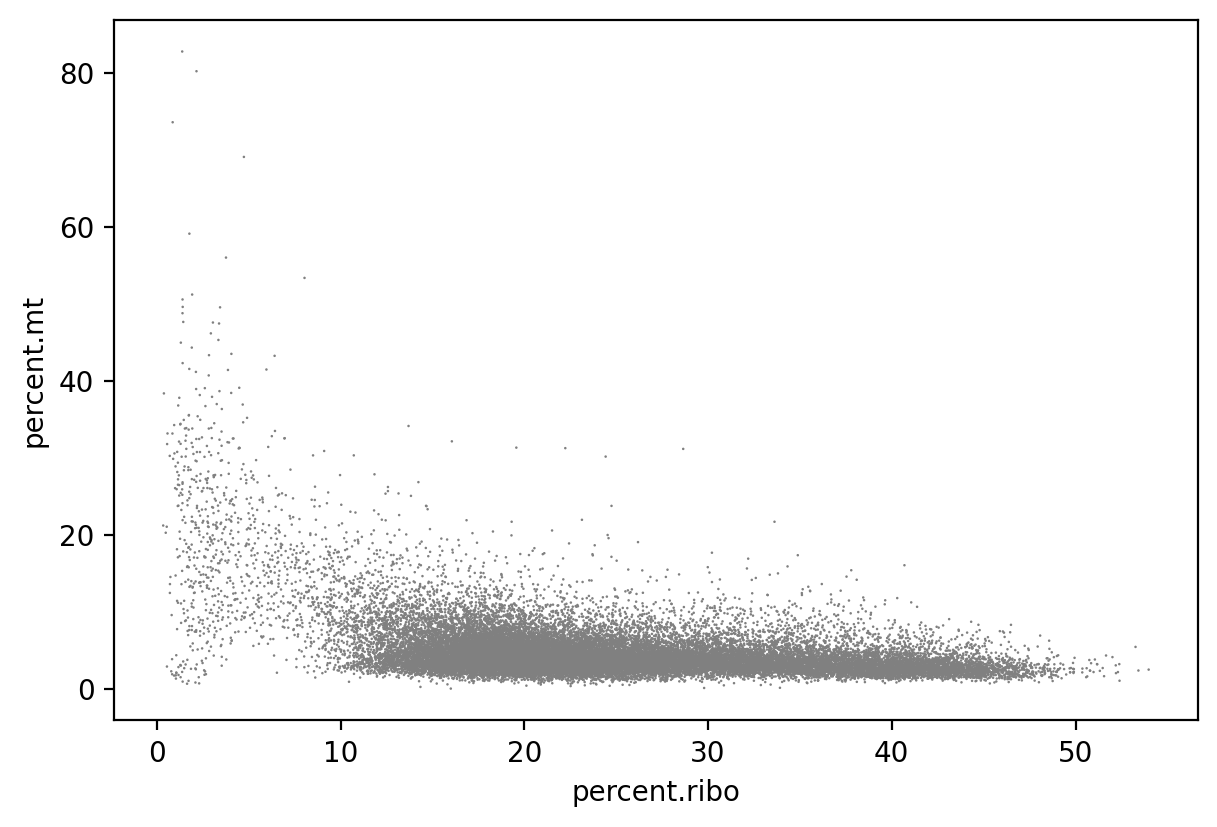

<Figure size 640x480 with 0 Axes>

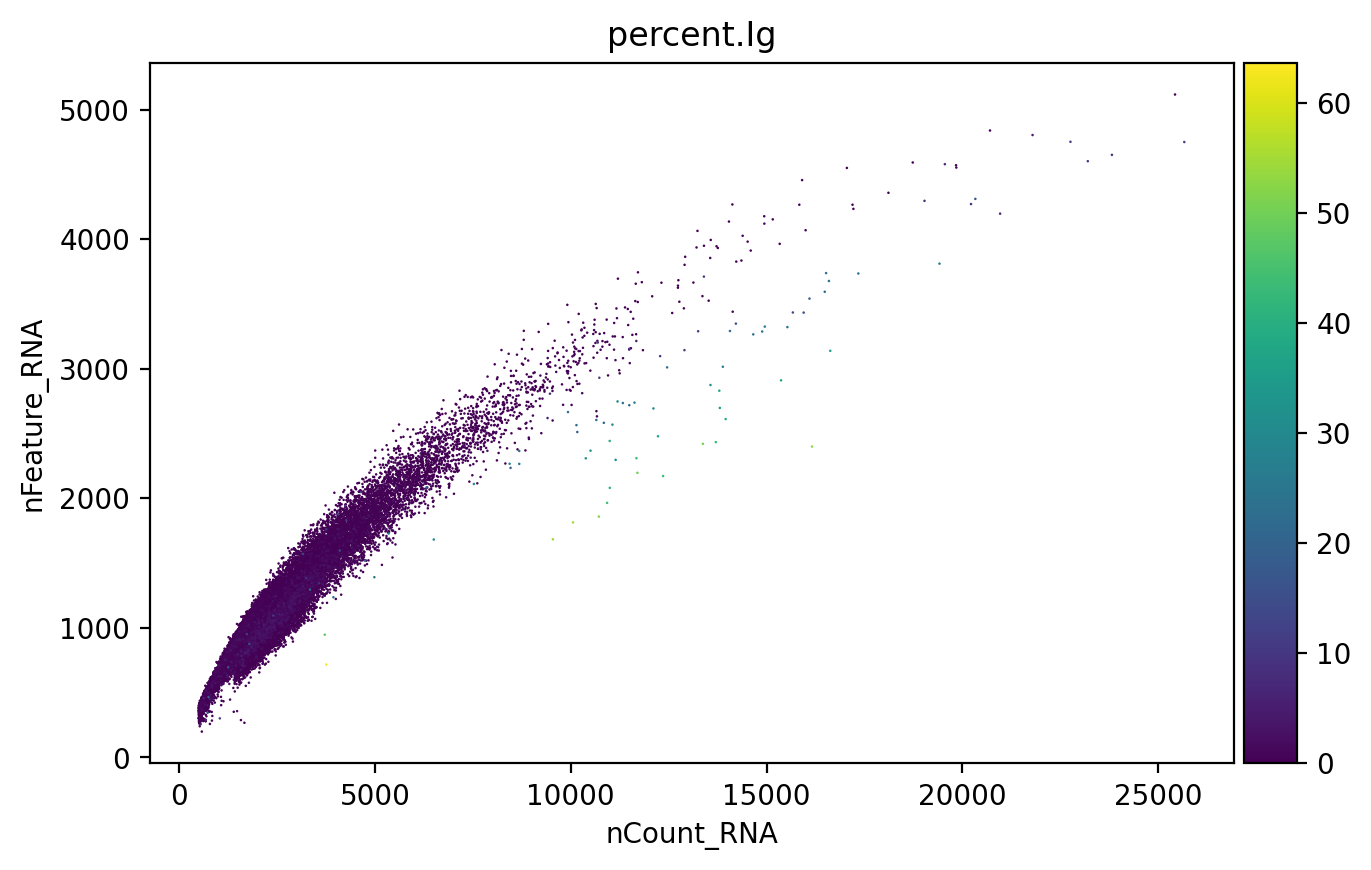

<Figure size 640x480 with 0 Axes>

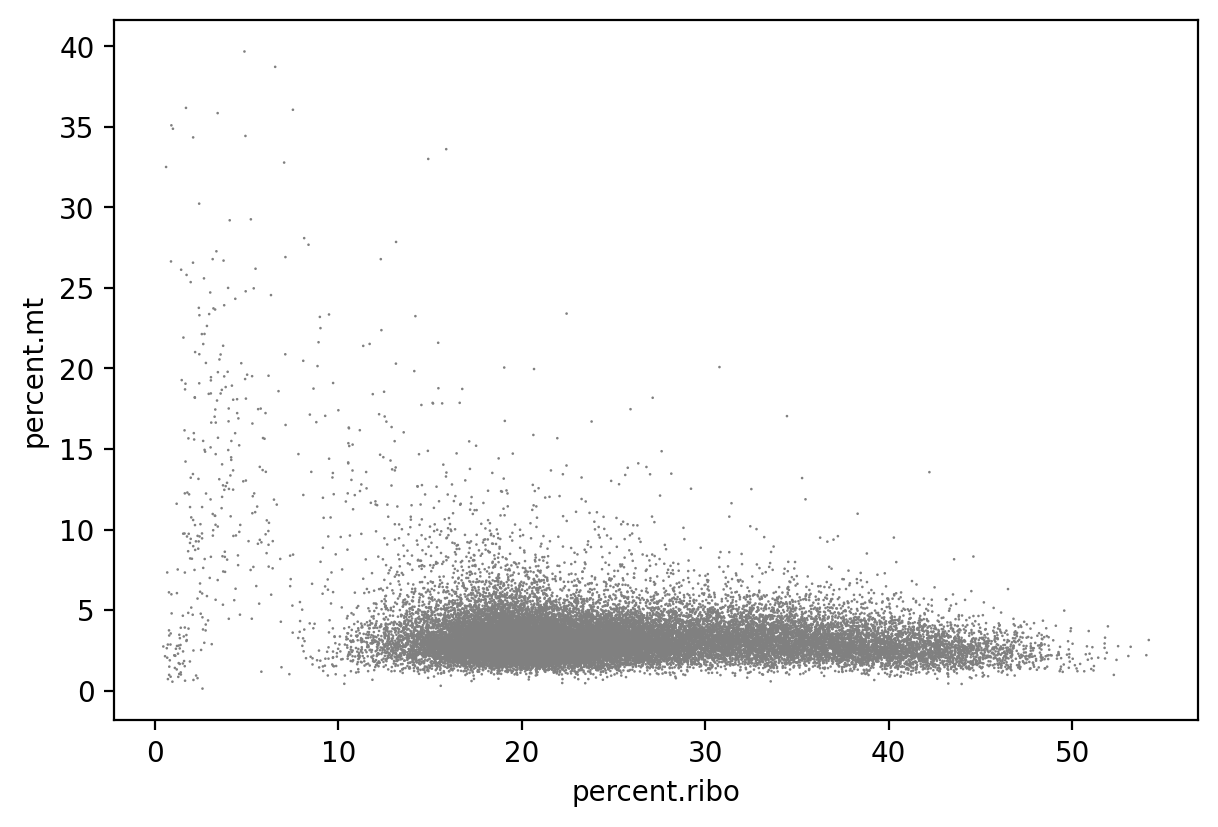

<Figure size 640x480 with 0 Axes>

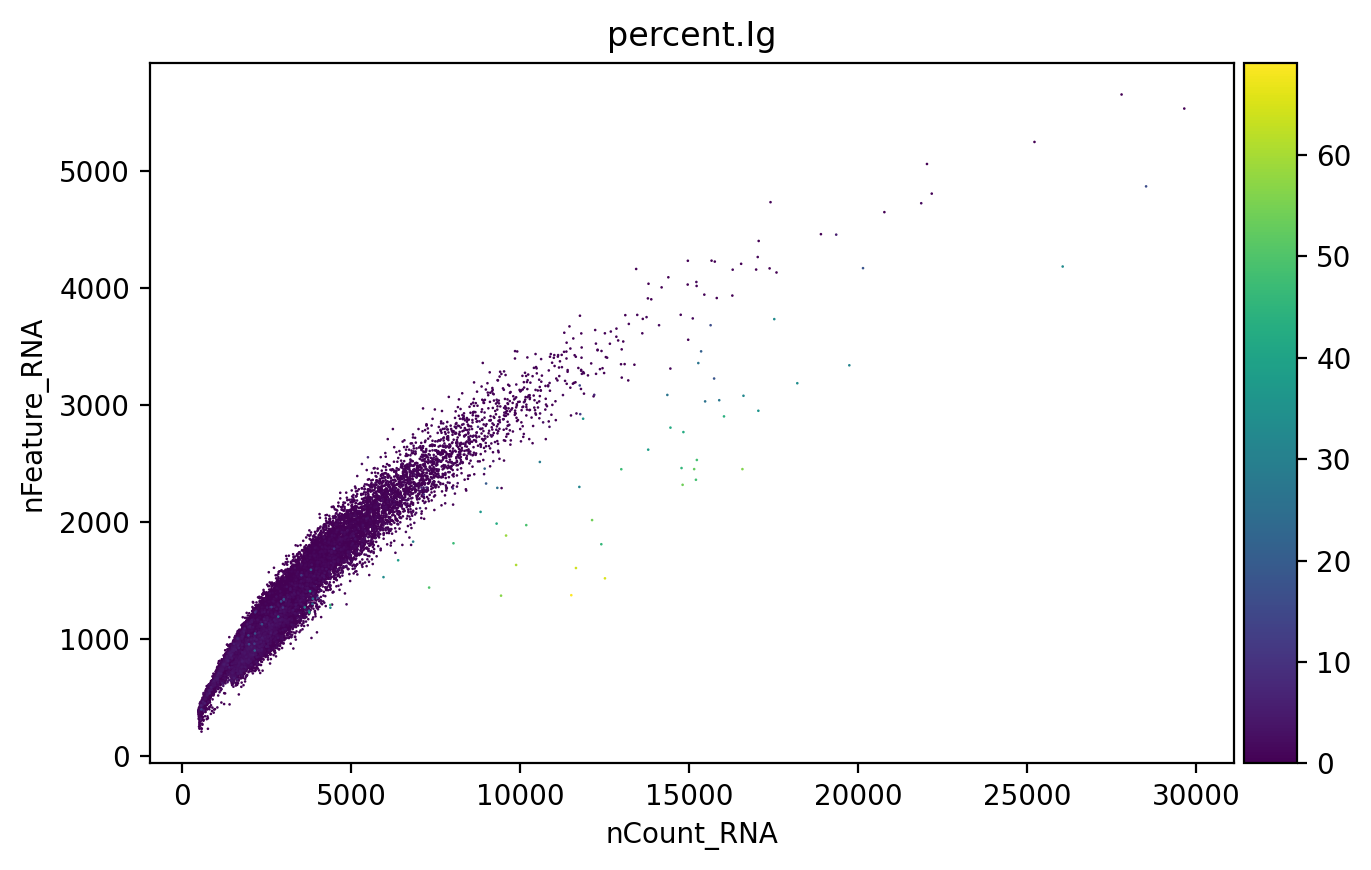

<Figure size 640x480 with 0 Axes>

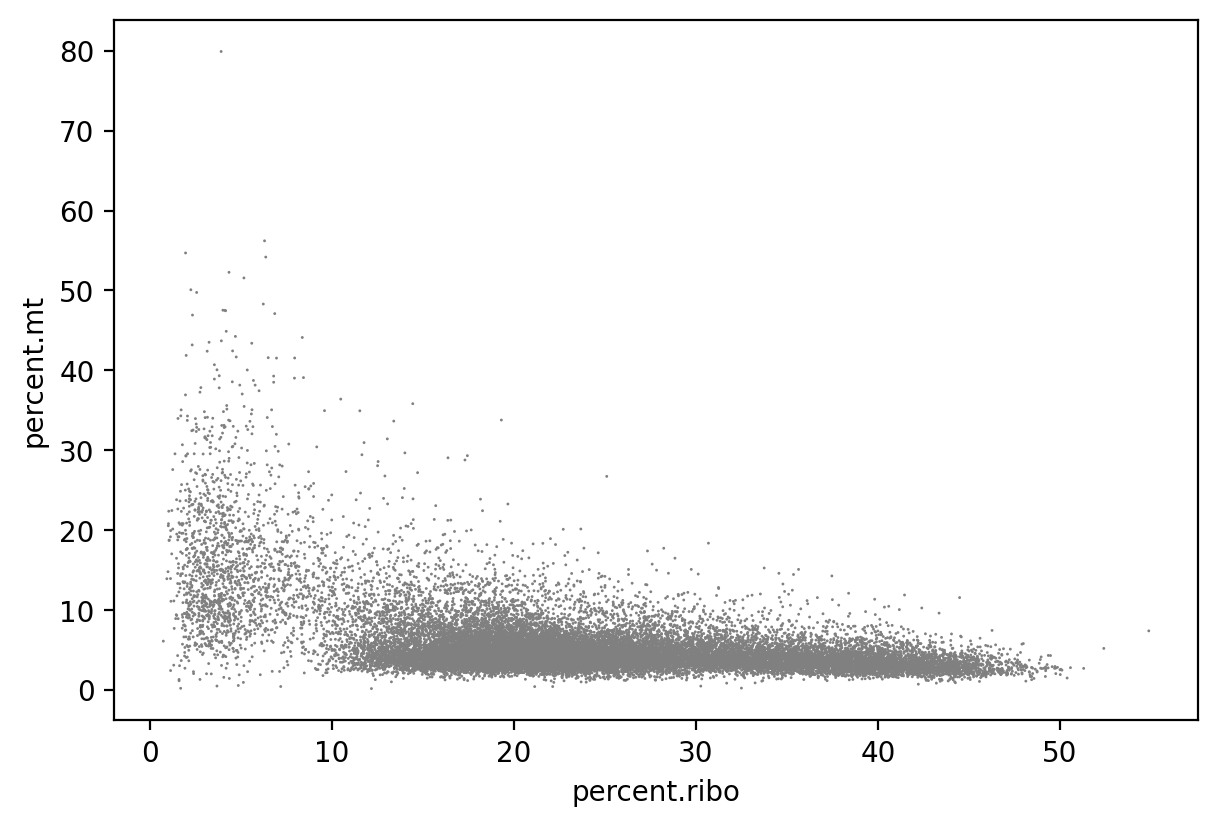

<Figure size 640x480 with 0 Axes>

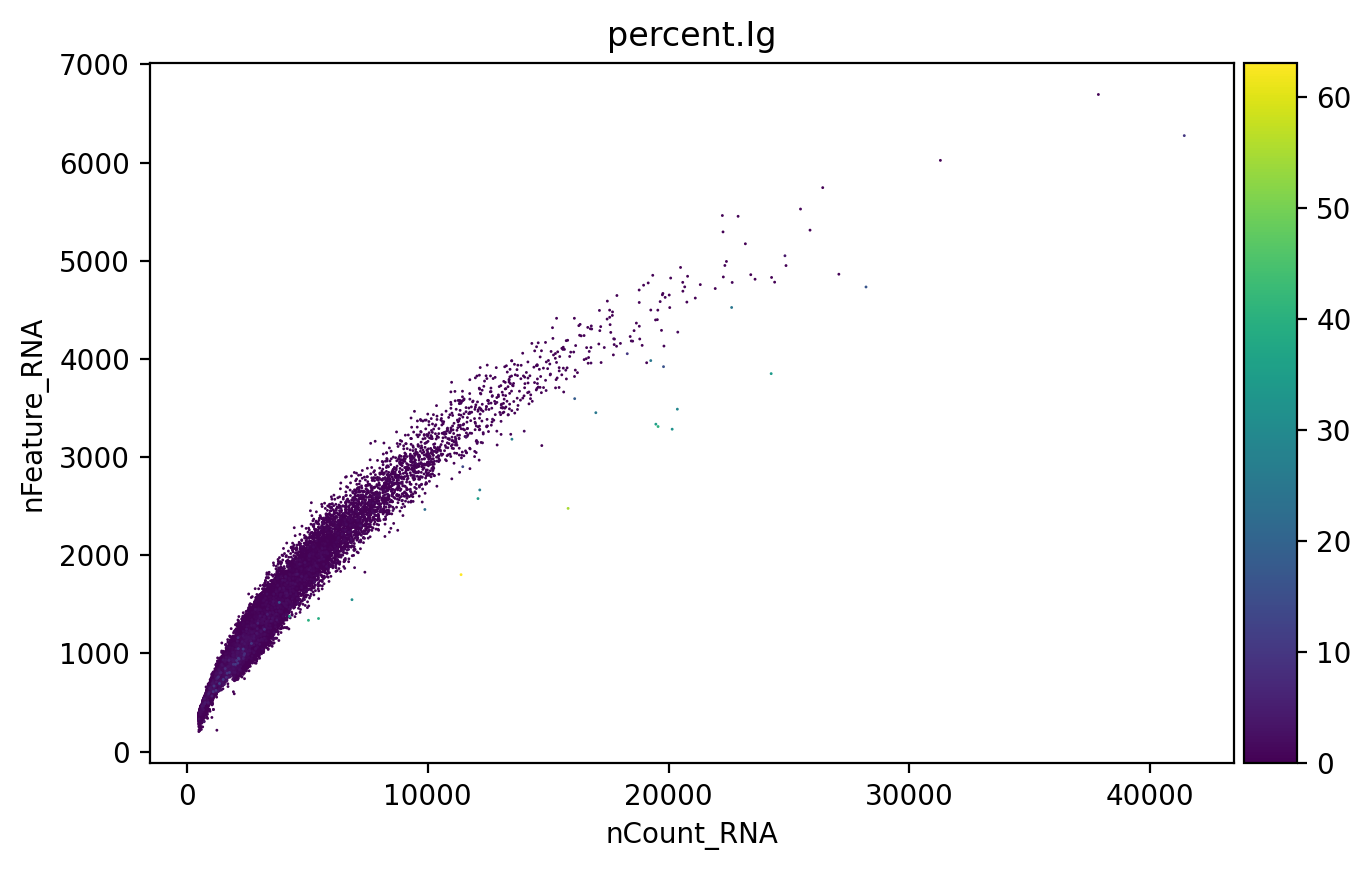

<Figure size 640x480 with 0 Axes>

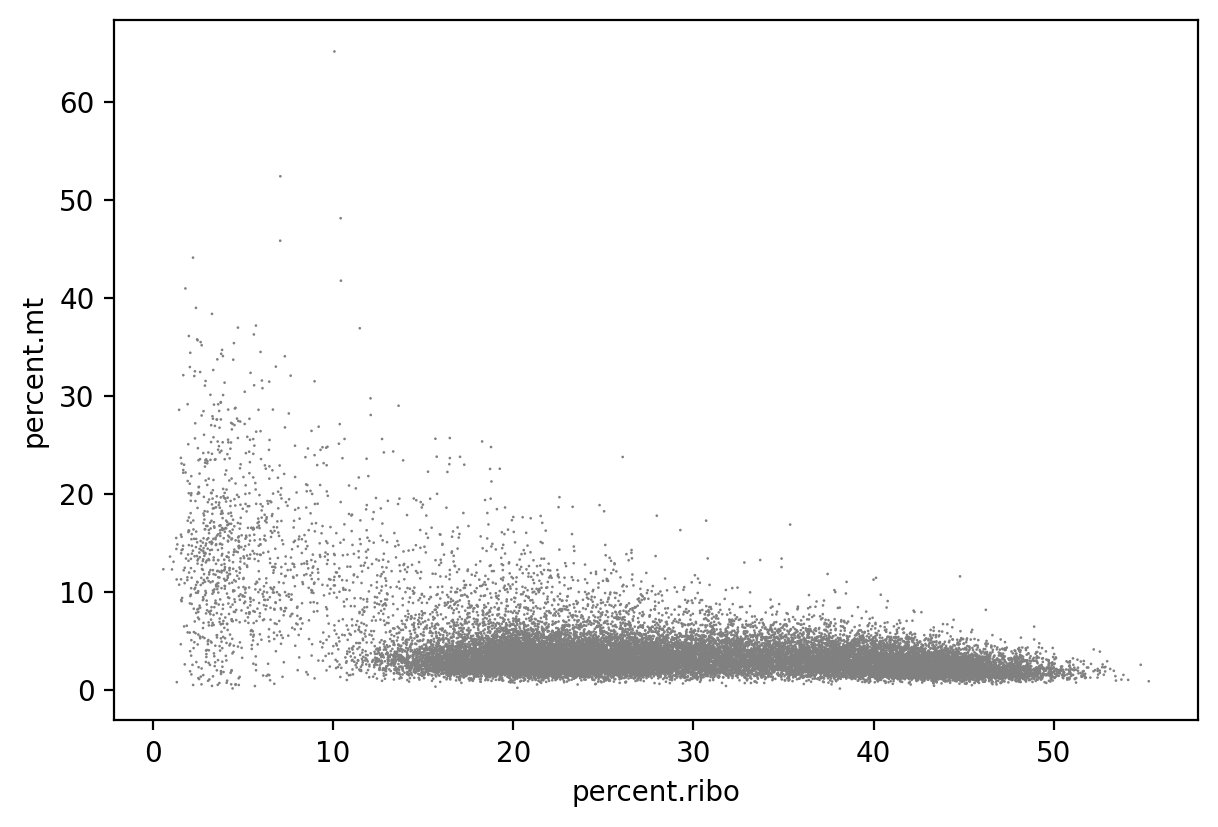

<Figure size 640x480 with 0 Axes>

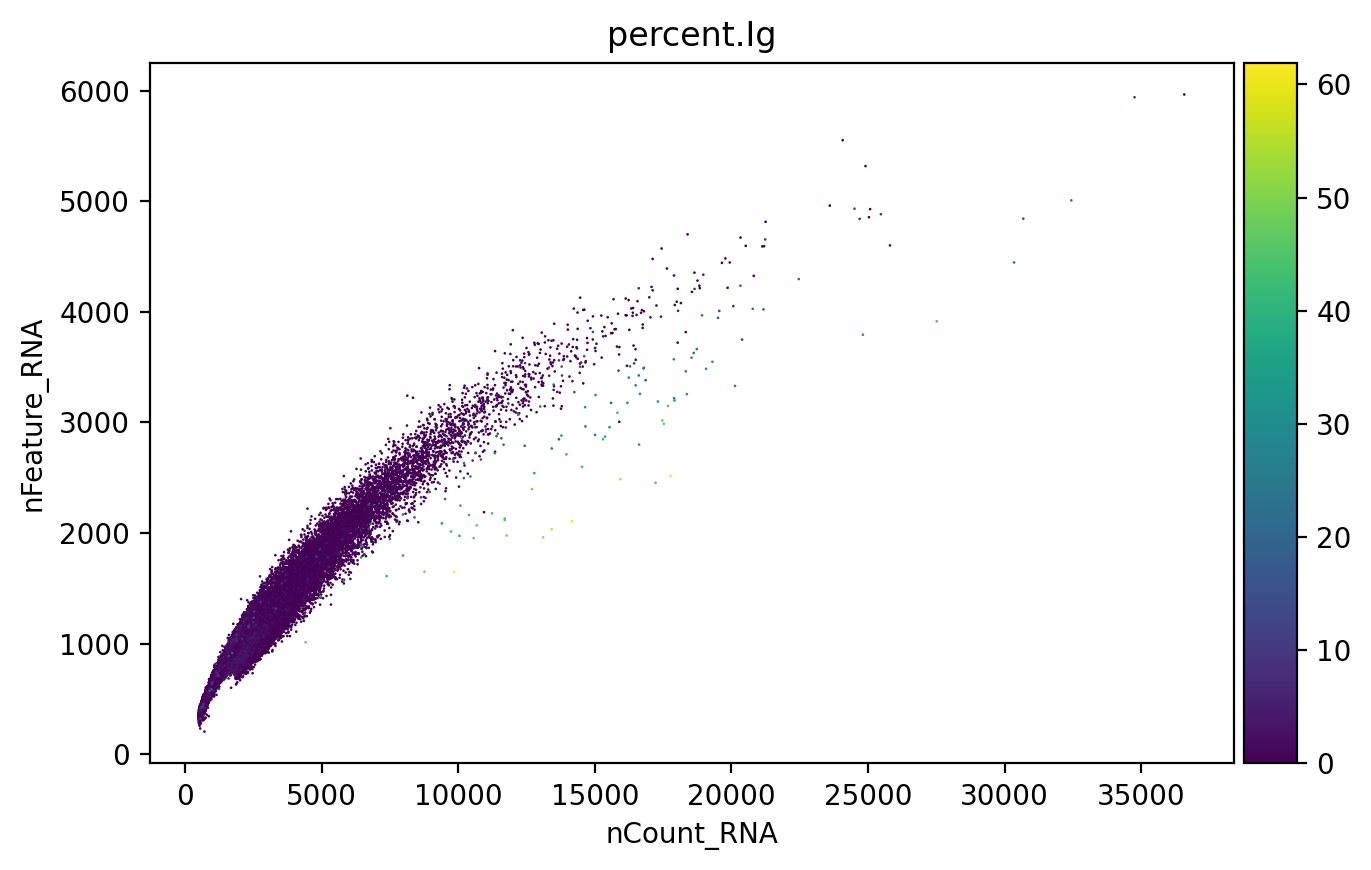

<Figure size 640x480 with 0 Axes>

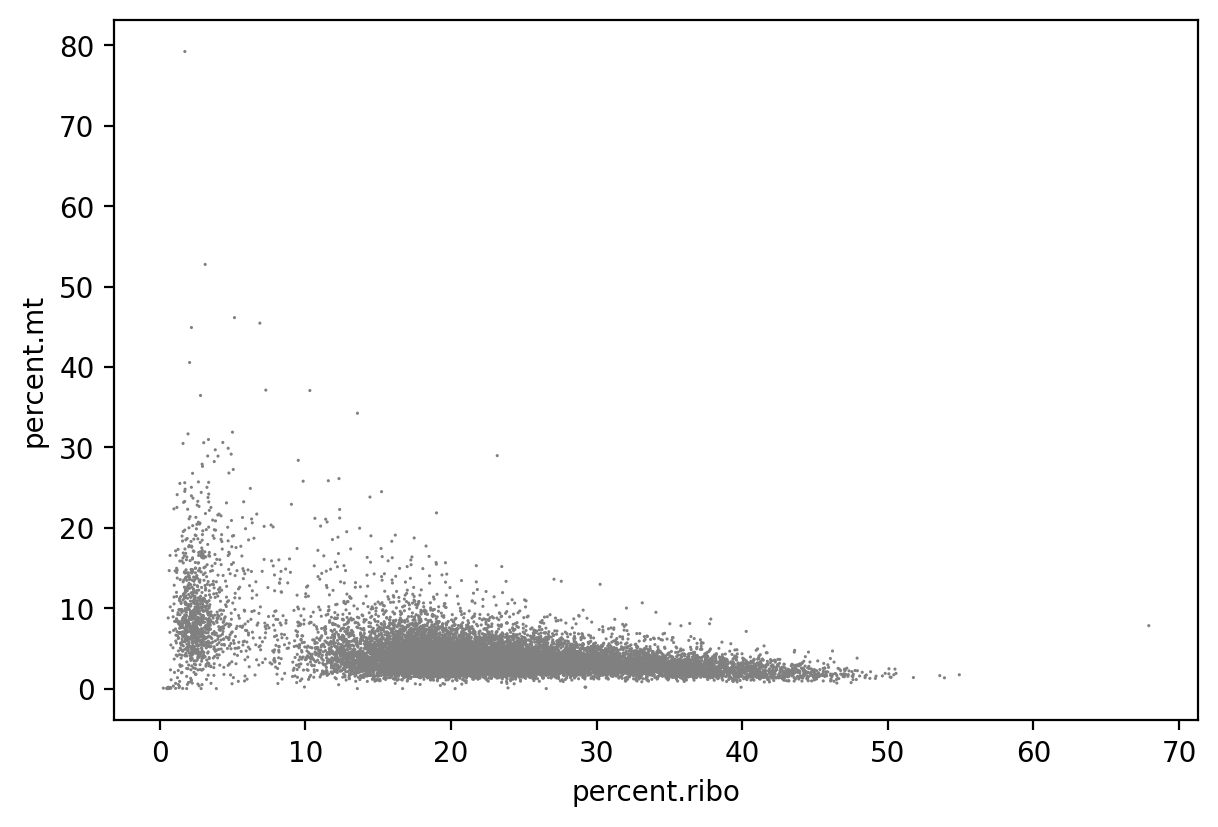

<Figure size 640x480 with 0 Axes>

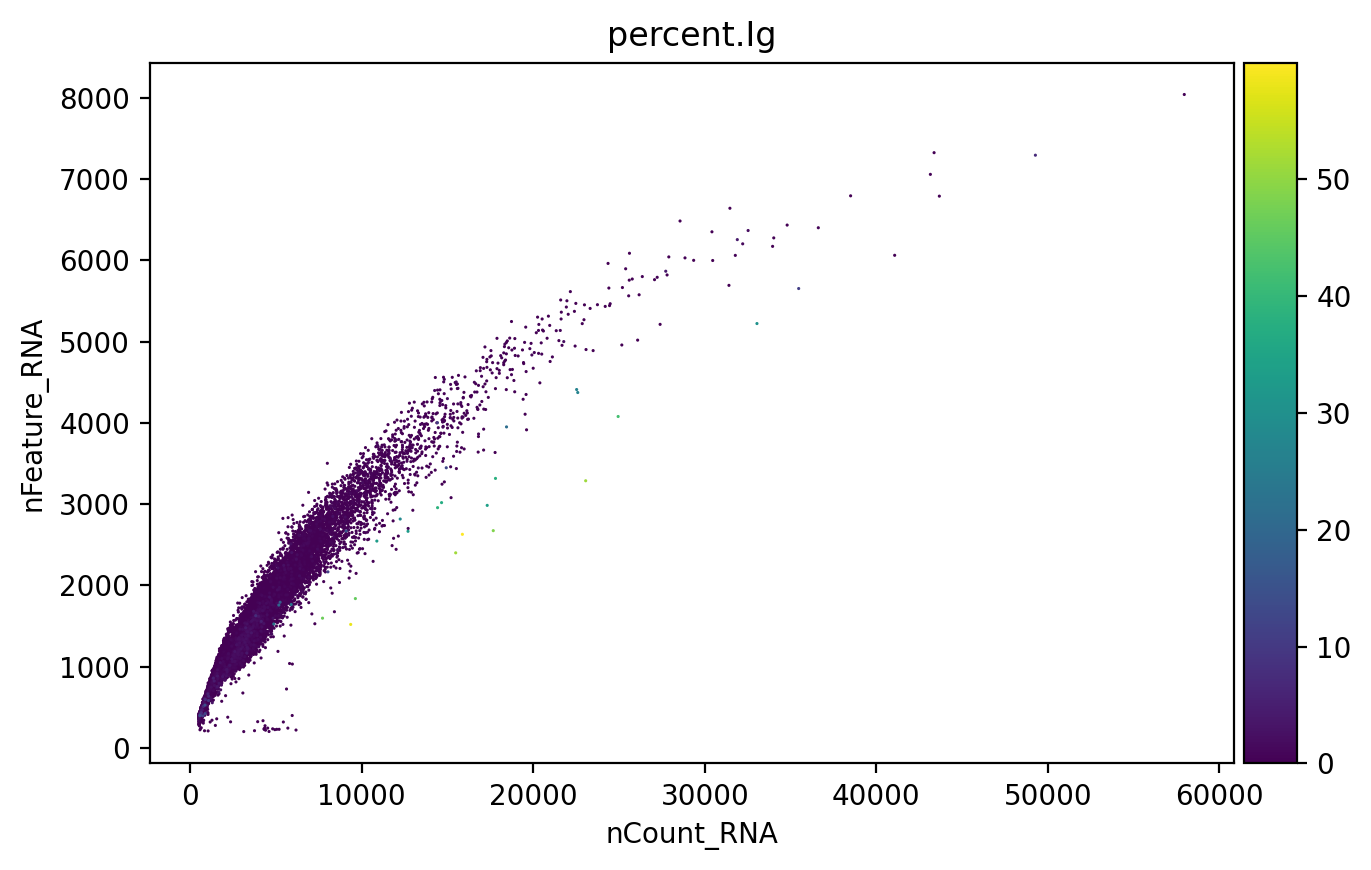

<Figure size 640x480 with 0 Axes>

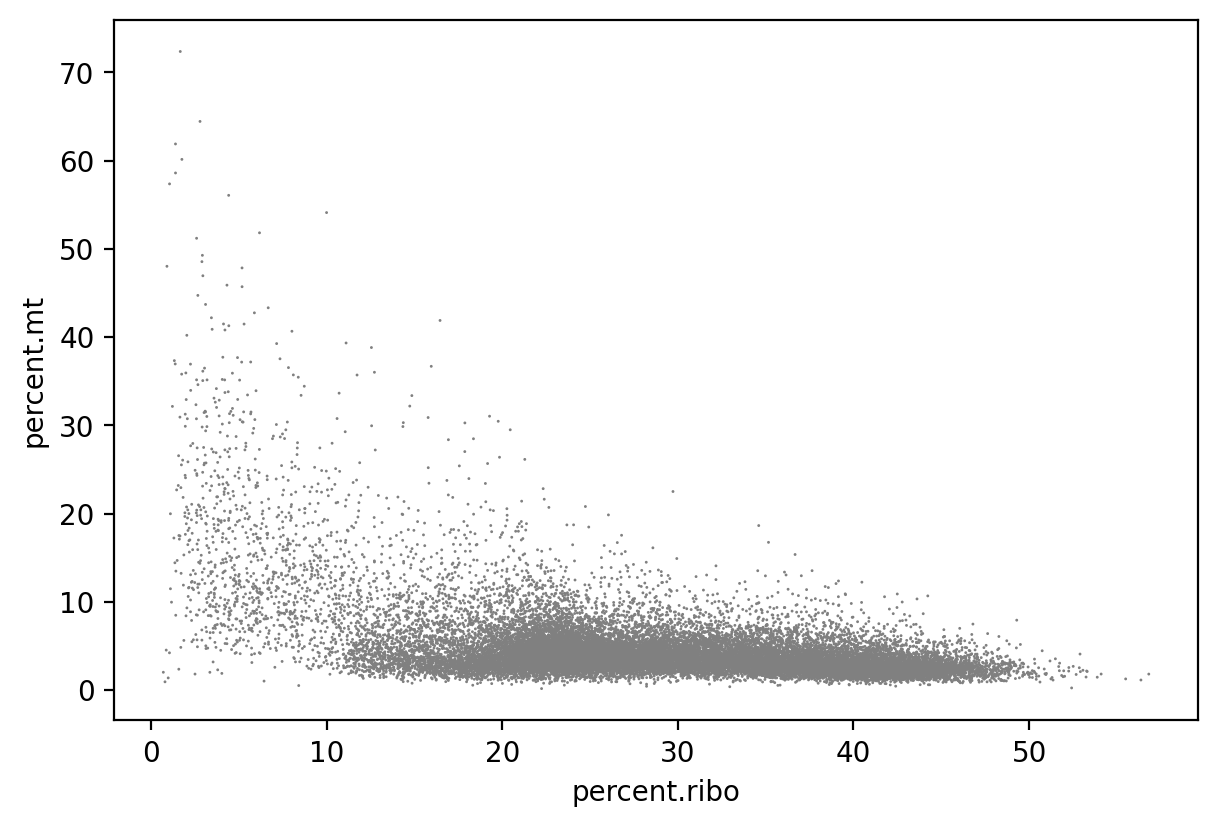

<Figure size 640x480 with 0 Axes>

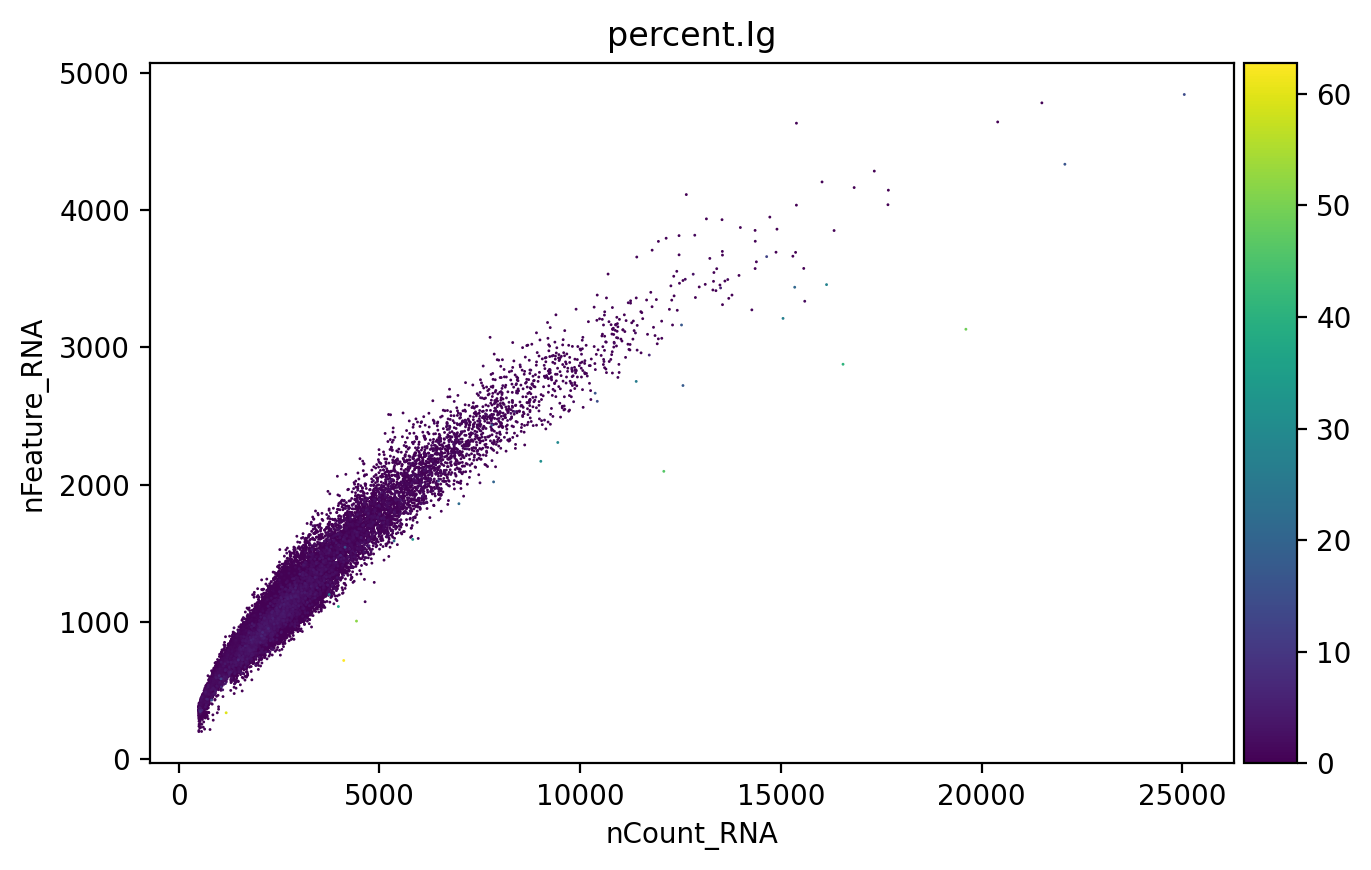

In [7]:
for i in adata_list:
    with plt.rc_context():
        sc.pl.scatter(i, x='percent.ribo', y='percent.mt')
        plt.savefig(plot_dir+ np.array2string(np.unique(set(i.obs["sample_ID"].astype(str)))) +"QC_scatter.png", bbox_inches="tight", dpi=300)

    with plt.rc_context():
        sc.pl.scatter(i, x='nCount_RNA', y='nFeature_RNA', color = 'percent.Ig')
        plt.savefig(plot_dir+ np.array2string(np.unique(set(i.obs["sample_ID"].astype(str)))) +"QC_scatter_feat_ig.png", bbox_inches="tight", dpi=300)

    

In [8]:
QC_list = []
for adata in adata_list:
    conditions = [
        (adata.obs["nCount_RNA"]<200), ##absolute quality thresholds
        (adata.obs["percent.mt"]>20),
        (adata.obs["percent.mt"]>10) & (adata.obs["percent.mt"]<=20),
        (adata.obs["percent.Ig"]<4) & (adata.obs["nFeature_RNA"]>3000), 
        (adata.obs["percent.mt"]<=10),
        (adata.obs["nCount_RNA"]>=200),
        (adata.obs["percent.Ig"]>=4) & (adata.obs["nFeature_RNA"]<=3000), 
    ]
    # create a list of the values we want to assign for each condition
    values = ["critical", "poor", "moderate", "optional", "high", "high", "high"]
    
    adata.obs["QC_label"] = np.select(conditions, values)
    adata.obs["QC_label"].unique().tolist()
    
    adata = adata[adata.obs["QC_label"].isin(["high"])].copy()
    QC_list.append(adata)

<Figure size 640x480 with 0 Axes>

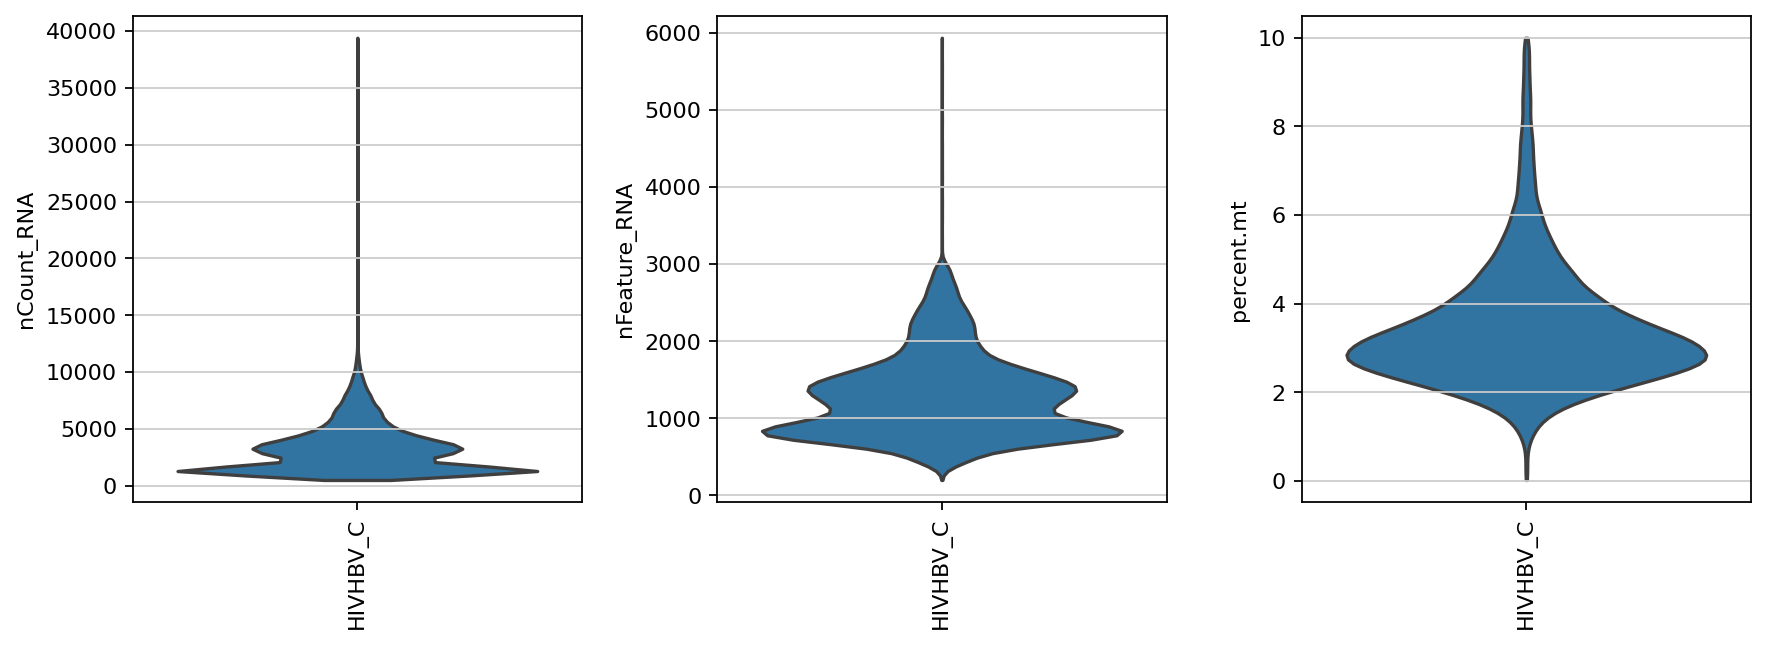

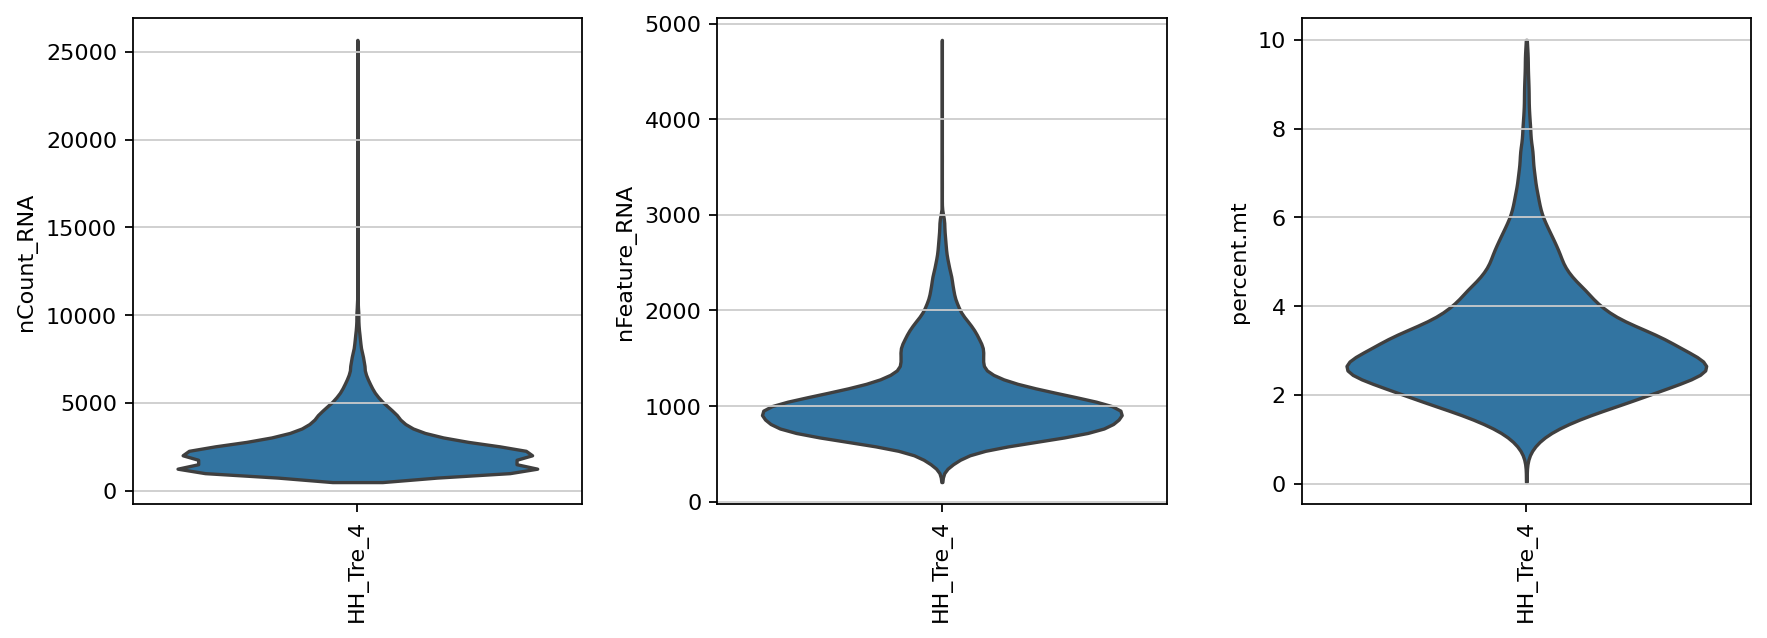

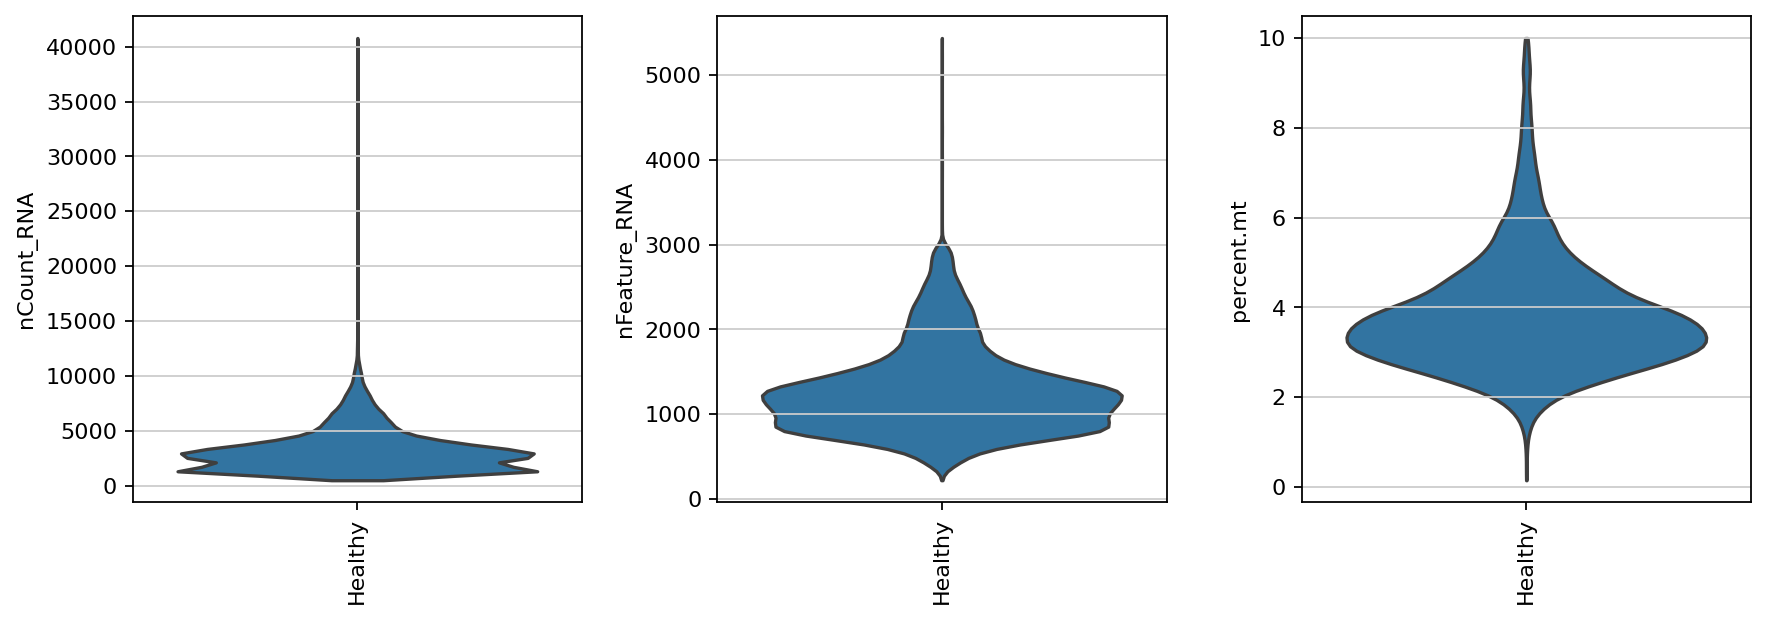

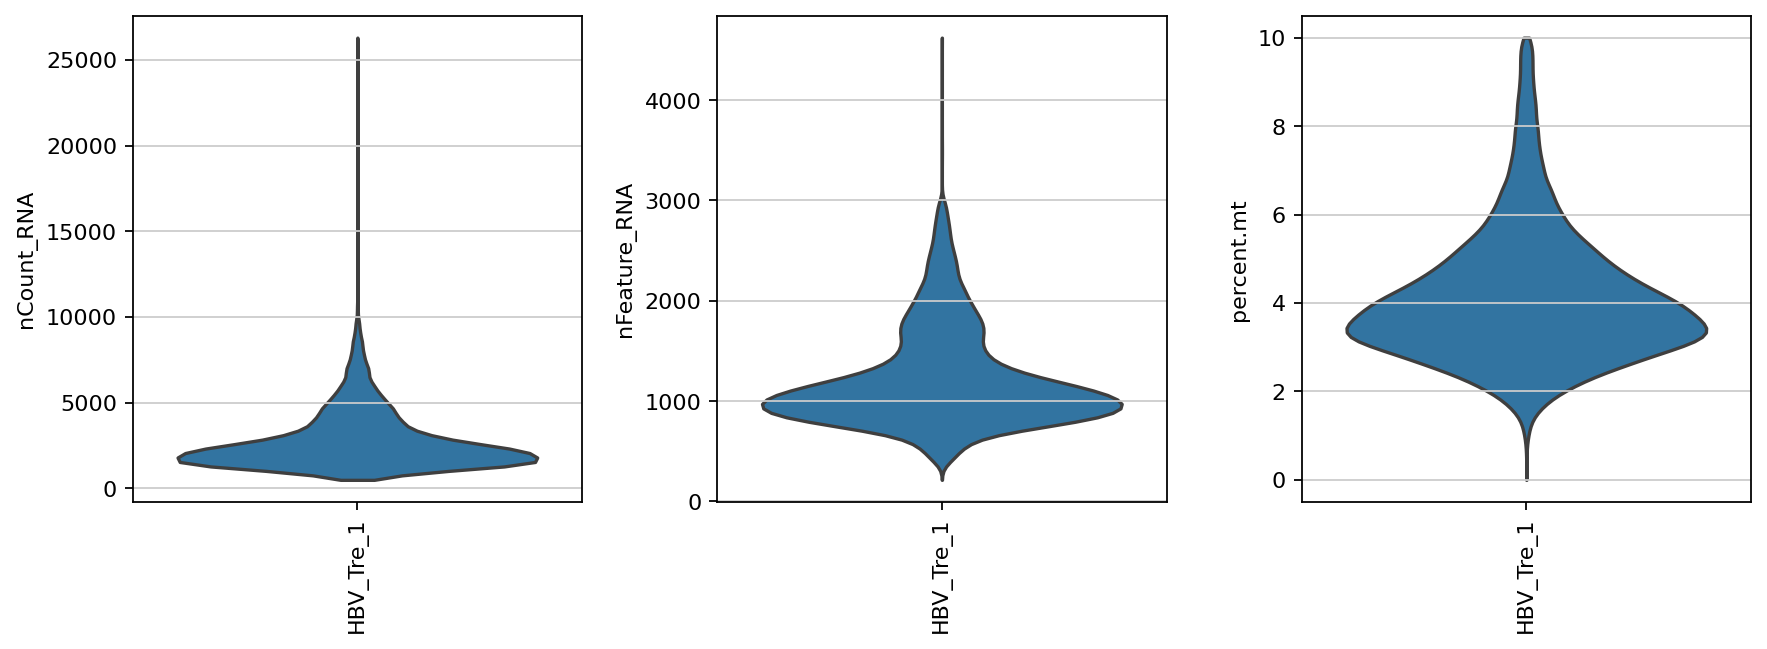

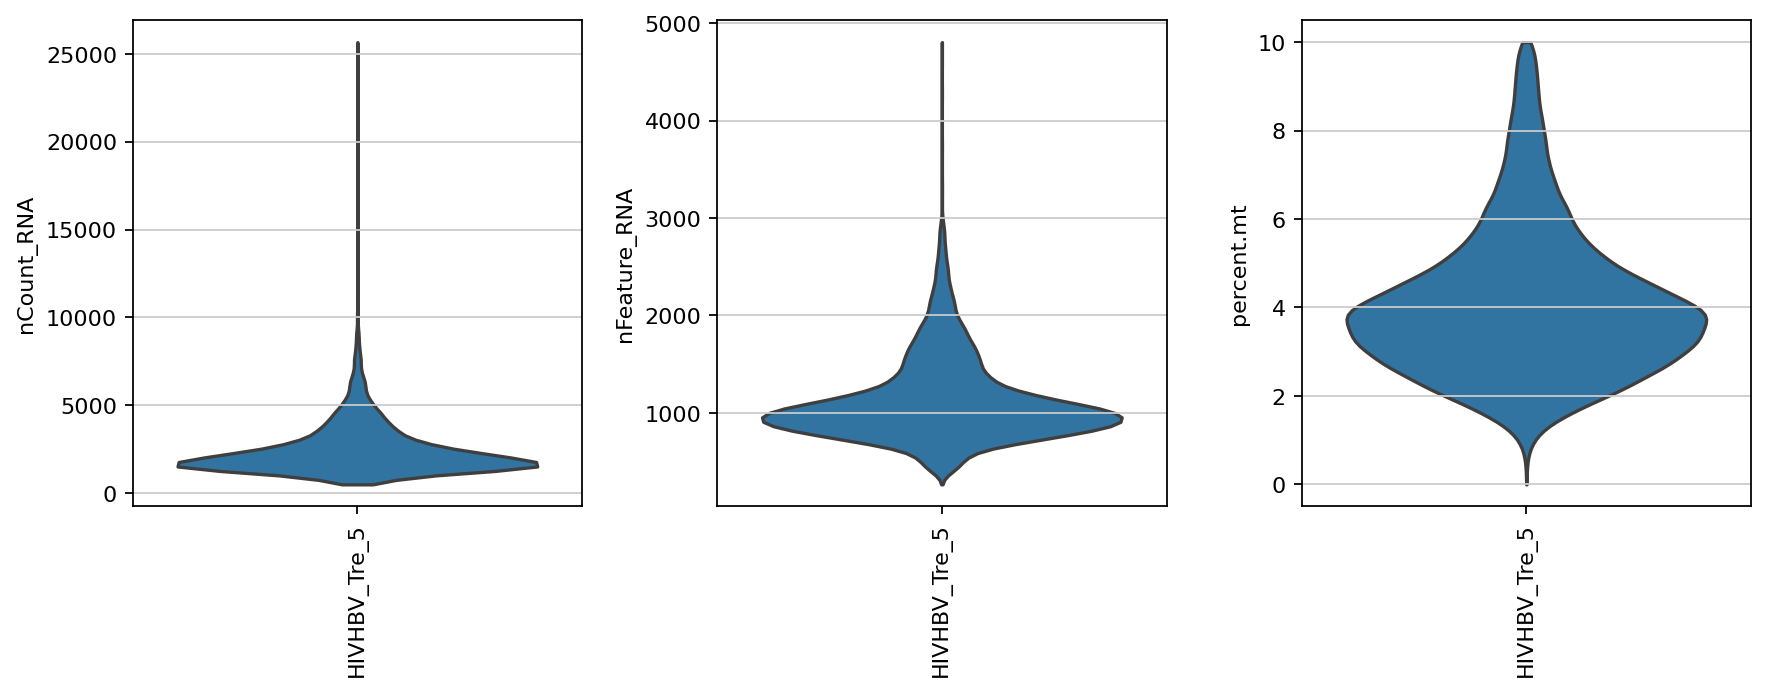

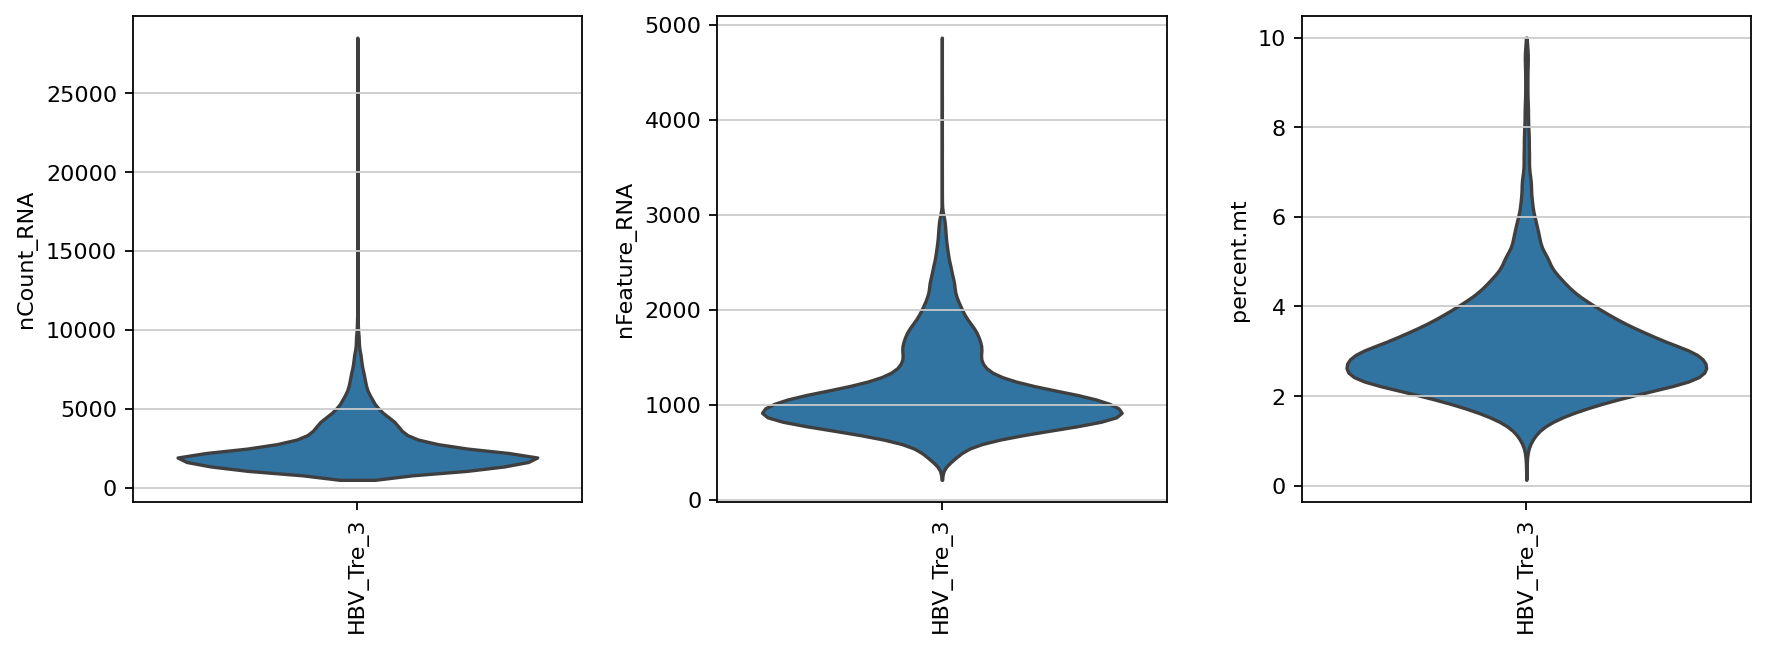

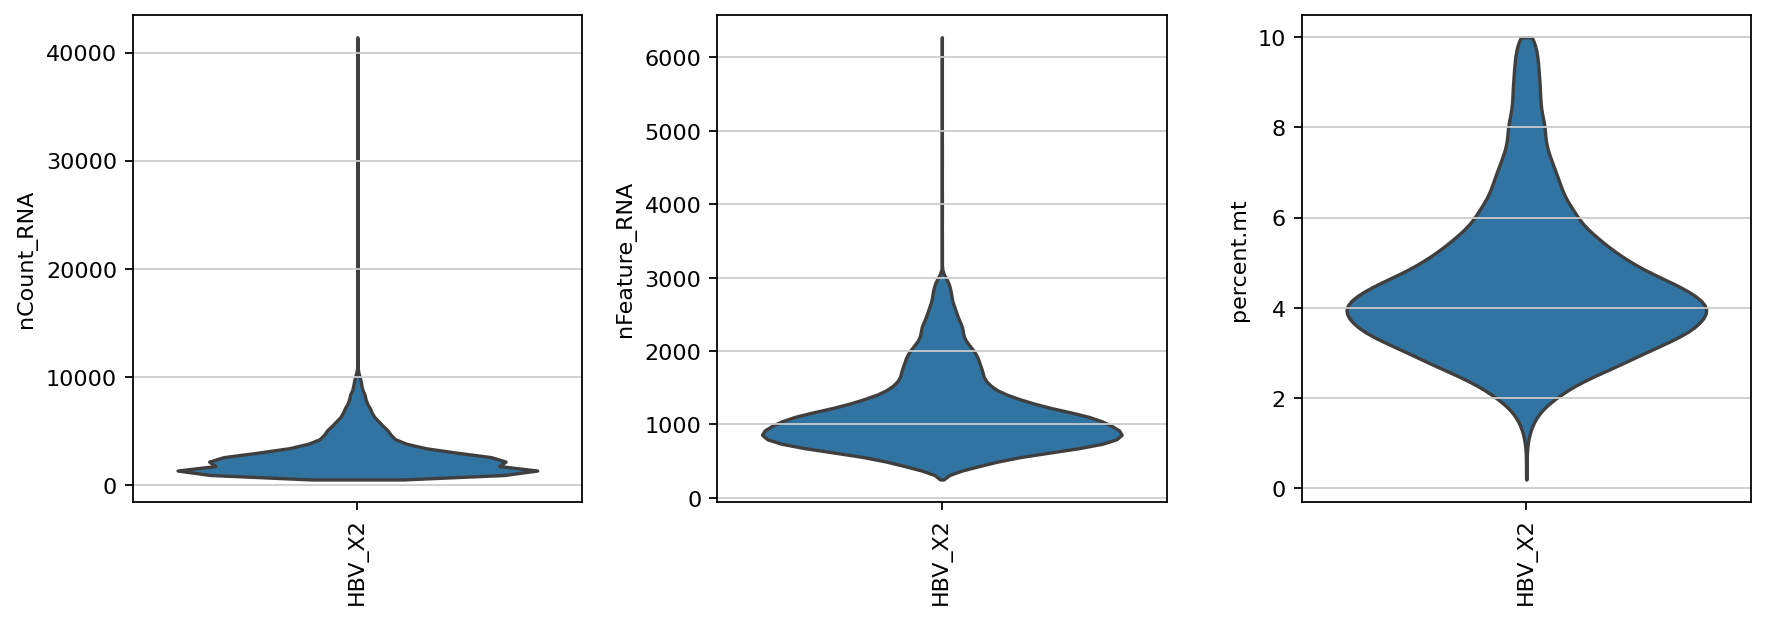

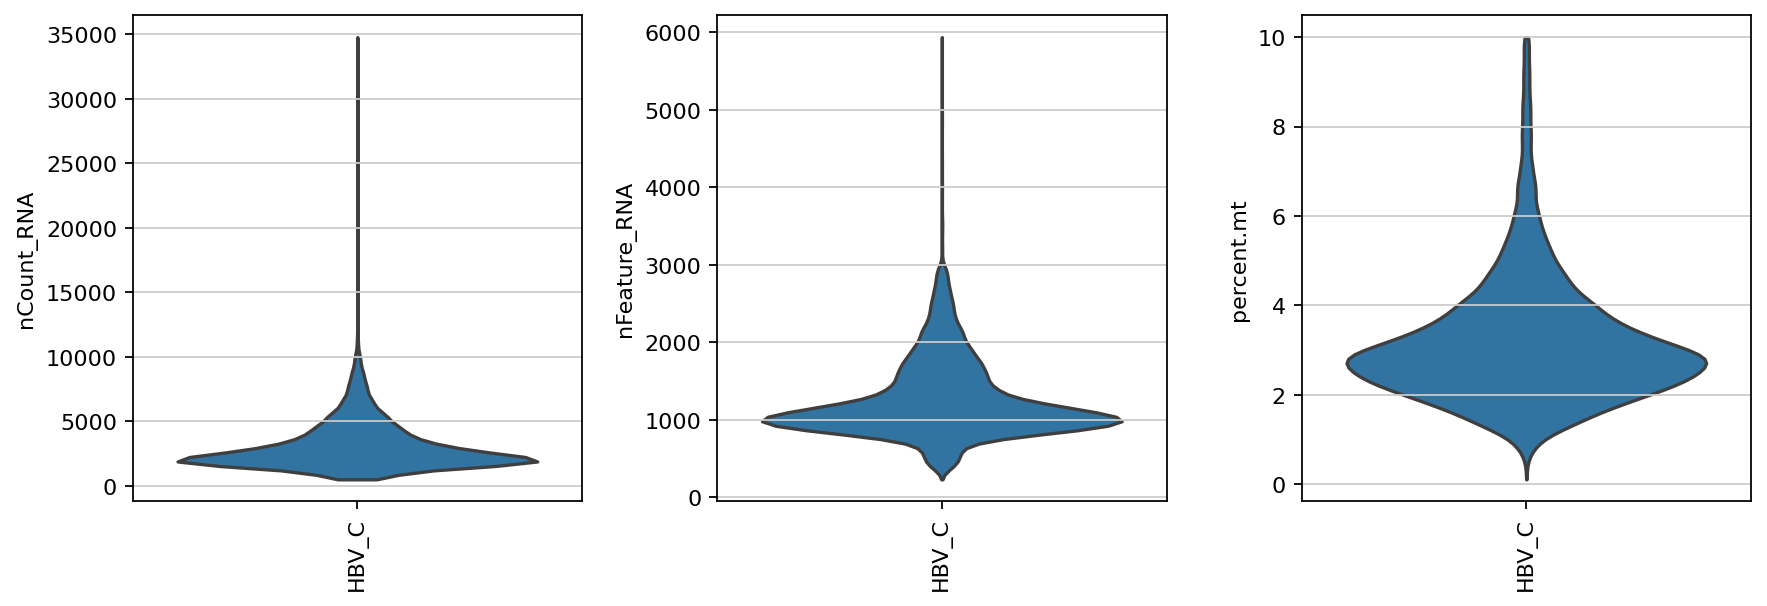

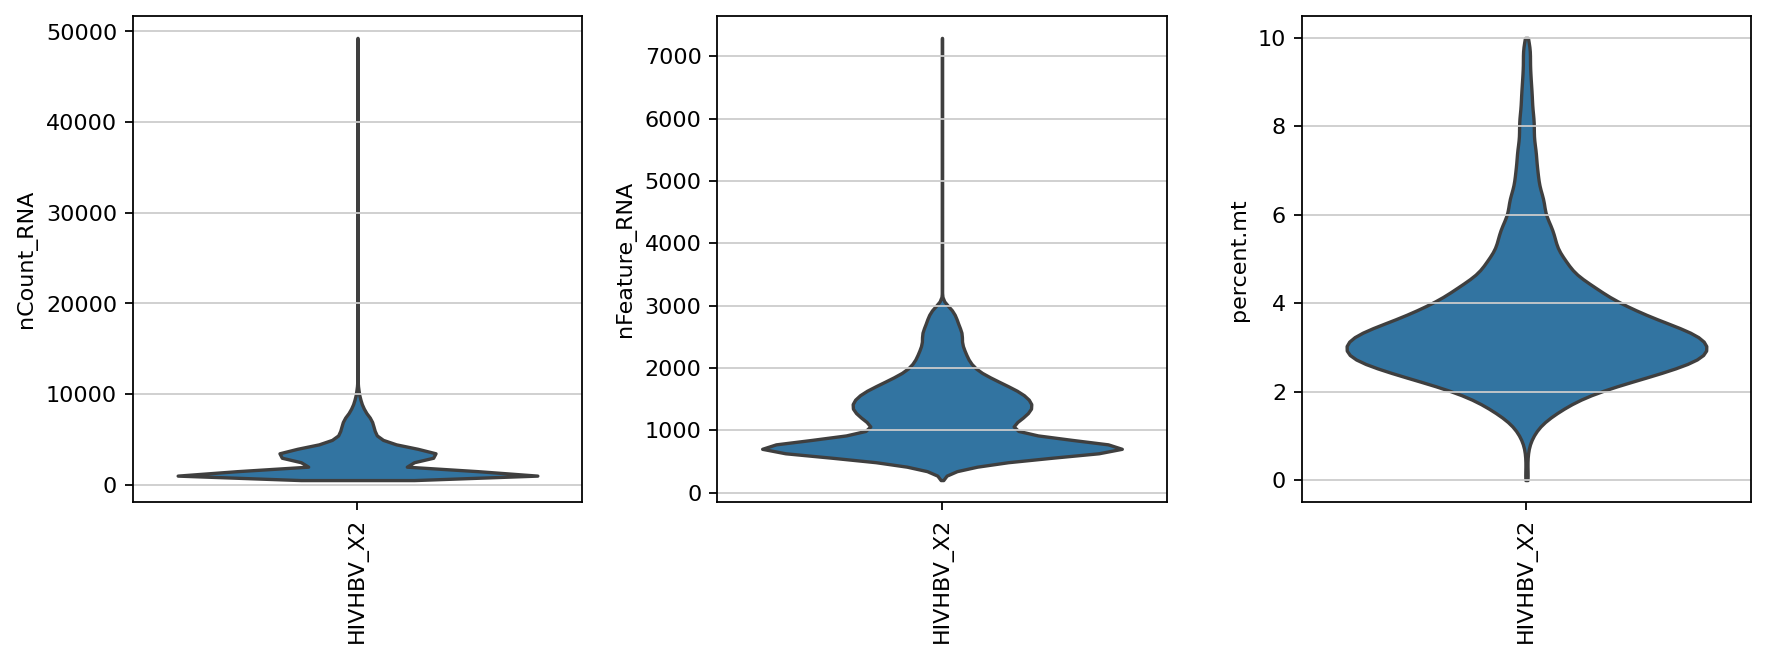

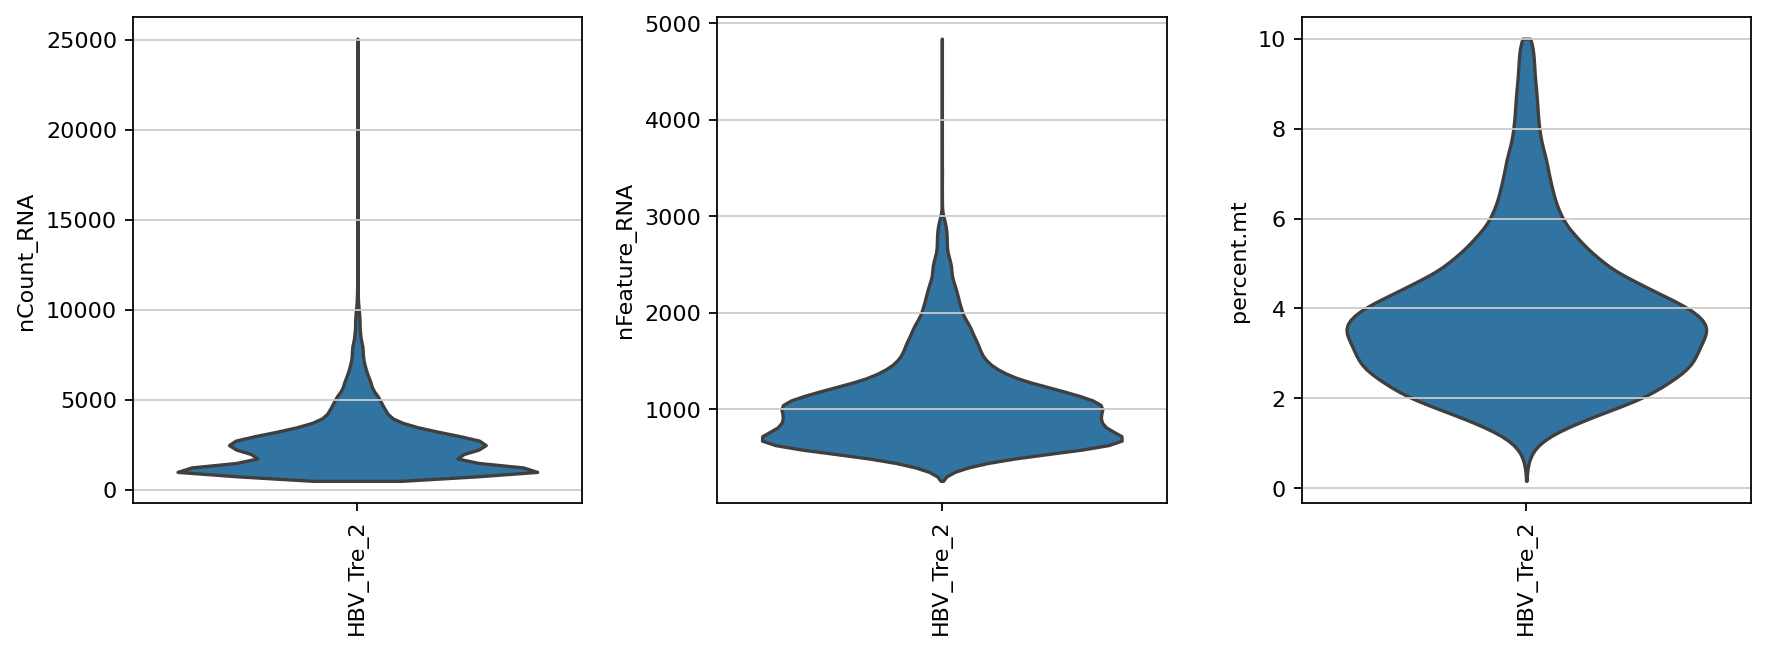

In [9]:
for i in QC_list:
    with plt.rc_context():
        sc.set_figure_params(scanpy=True, fontsize=10)
        sc.pl.violin(i, ['nCount_RNA', 'nFeature_RNA', 'percent.mt'],groupby='sample_ID',
               stripplot=False,multi_panel=True, rotation=90, ncol=1)


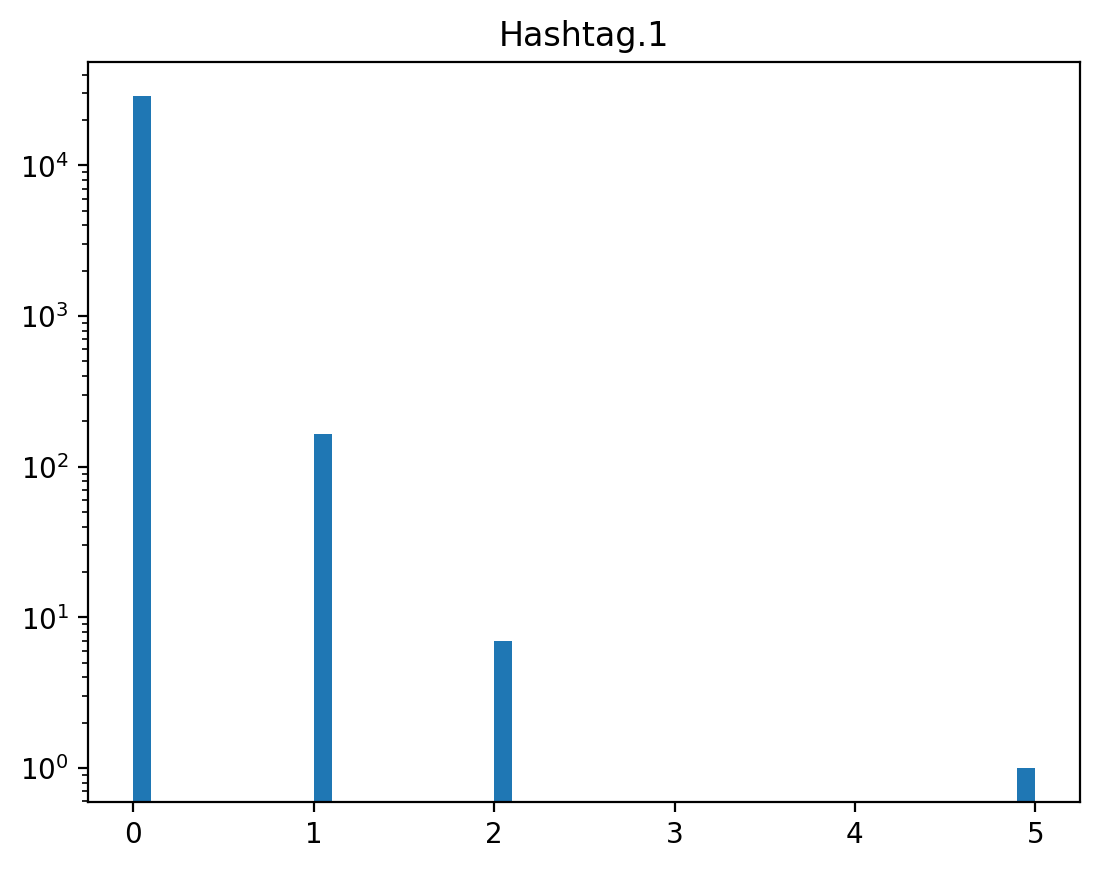

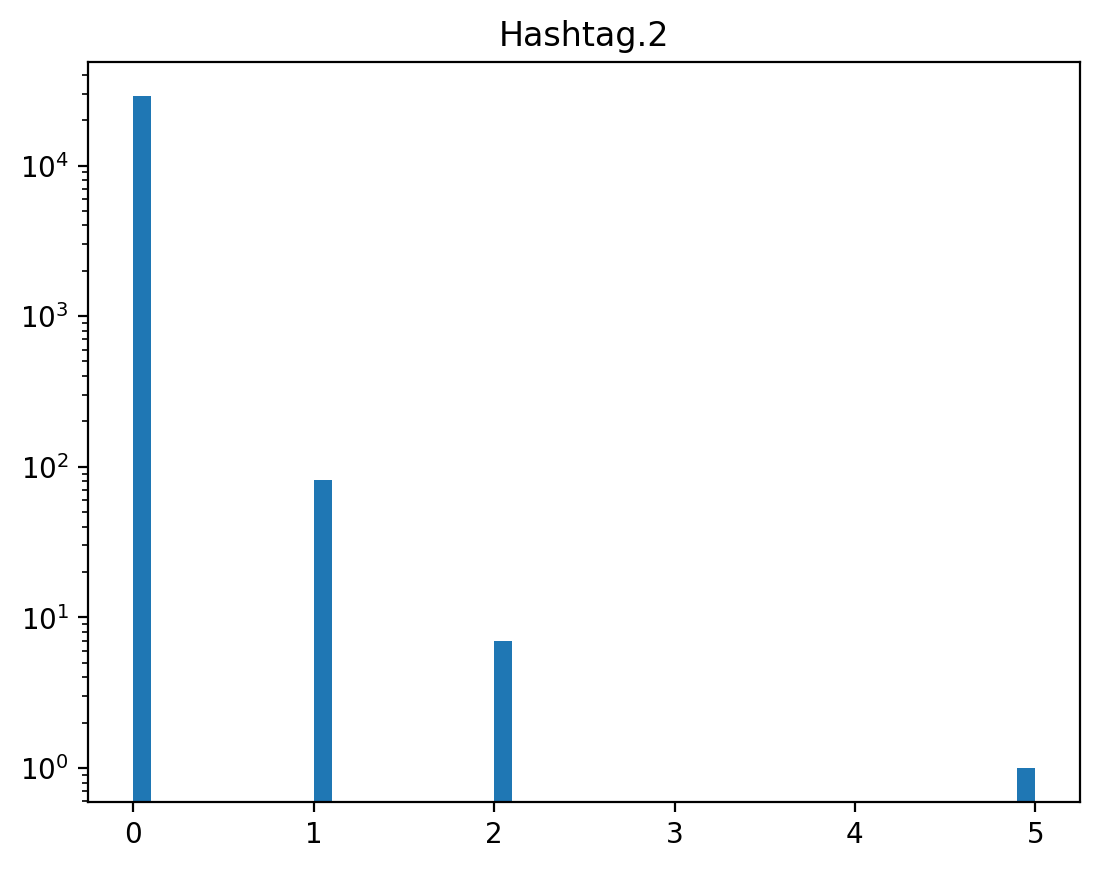

In [10]:
##Healthy does not have HTO, item 3
set(QC_list[2].obs["sample_ID"])

with plt.rc_context():
            plt.hist(QC_list[2].obs['Hashtag.1'], bins=50, log=True)
            plt.title('Hashtag.1')
            
plt.show()

with plt.rc_context():
            plt.hist(QC_list[2].obs['Hashtag.2'], bins=50, log=True)
            plt.title('Hashtag.2')
            
plt.show()

In [11]:
Healthy = QC_list[2]

In [12]:
del QC_list[2]


## Run Hashsolo

In [13]:
for adata in QC_list:
    sce.pp.hashsolo(adata, ['Hashtag.1', 'Hashtag.2'], number_of_noise_barcodes=1)
    print(adata.obs["Classification"].value_counts())


Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
Hashtag.1    13326
Hashtag.2     8510
Doublet       1455
Negative         6
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
Hashtag.1    17512
Hashtag.2    10427
Doublet       2382
Negative        17
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
Hashtag.1    17771
Hashtag.2    12113
Doublet       2631
Negative        24
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_hashsolo.py:364: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:, "most_likely_hypothesis"] = posterior_dict[
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_hashsolo.py:367: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:, "cluster_feature"] = 0
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_has

Hashtag.1    16861
Hashtag.2    14621
Doublet       2903
Negative        33
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
Hashtag.1    17908
Hashtag.2    12233
Doublet       3013
Negative       192
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
Hashtag.1    15520
Hashtag.2     8927
Doublet       1302
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
Hashtag.1    22495
Hashtag.2     5800
Doublet       2945
Negative        12
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_hashsolo.py:364: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:, "most_likely_hypothesis"] = posterior_dict[
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_hashsolo.py:367: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:, "cluster_feature"] = 0
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_has

Hashtag.1    13940
Hashtag.2     6916
Doublet       1212
Name: Classification, dtype: int64
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
Hashtag.1    15713
Hashtag.2     8959
Doublet       2306
Negative        12
Name: Classification, dtype: int64


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_hashsolo.py:364: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:, "most_likely_hypothesis"] = posterior_dict[
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scanpy/external/pp/_hashsolo.py:367: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:, "cluster_feature"] = 0


In [14]:
QC_list[3].obs["Classification"].value_counts()

Hashtag.1    16861
Hashtag.2    14621
Doublet       2903
Negative        33
Name: Classification, dtype: int64

In [15]:
for adata in QC_list:
    print(pd.crosstab(adata.obs["HTO_classification.global"], adata.obs["Classification"]))

Classification             Doublet  Hashtag.1  Hashtag.2  Negative
HTO_classification.global                                         
Doublet                       1382        152          0         0
Negative                         6       6952        274         6
Singlet                         67       6222       8236         0
Classification             Doublet  Hashtag.1  Hashtag.2  Negative
HTO_classification.global                                         
Doublet                       2345        563          0         0
Negative                         0       6421        228        17
Singlet                         37      10528      10199         0
Classification             Doublet  Hashtag.1  Hashtag.2  Negative
HTO_classification.global                                         
Doublet                       2554        551          0         0
Negative                         1       6182       2202        24
Singlet                         76      11038       9911      

In [16]:
singlet_list = []
for adata in QC_list:
    print(adata.shape)
    adata = adata[adata.obs["Classification"].isin(["Hashtag.1", "Hashtag.2"])].copy()
    singlet_list.append(adata)
    print(adata.shape)

    

(23297, 20743)
(21836, 20743)
(30338, 20458)
(27939, 20458)
(32539, 20845)
(29884, 20845)
(34418, 20899)
(31482, 20899)
(33346, 20596)
(30141, 20596)
(25749, 20909)
(24447, 20909)
(31252, 21208)
(28295, 21208)
(22068, 21025)
(20856, 21025)
(26990, 20357)
(24672, 20357)


In [17]:
Healthy.obs["Classification"] = "NA"

In [18]:
set(Healthy.obs["sample_ID"])
Healthy.obs["batch"] = Healthy.obs["sample_ID"].copy()

In [19]:
Healthy2 = Healthy.copy()

In [20]:
singlet_list.append(Healthy2)


## Run Solo for doublet detection

In [21]:
solo_list = []

for i in singlet_list:
    #sc.pp.subsample(adata_list[name], n_obs=20000, random_state=0)
    ## setup model parameters 
    i.layers["counts"] = i.X.copy()
    outfile = "/well/immune-rep/users/vbw431/Projects/Peppa/scvi/"+np.array2string(np.unique(set(i.obs["sample_ID"].astype(str))))+"_model"
    
    #hvg
    sc.pp.highly_variable_genes(
        i,
        n_top_genes=3000,
        flavor = "seurat_v3",
        subset=True)
    
    ## train model
    early_stopping_kwargs = {
        "early_stopping": True,
        "early_stopping_monitor": "elbo_validation",
        "early_stopping_patience": 10,
        "early_stopping_min_delta": 0.001,
        }
    scvi.model.SCVI.setup_anndata(i)
    vae = scvi.model.SCVI(i)
    vae.train(max_epochs = 500, **early_stopping_kwargs)
    vae.save(outfile, save_anndata=True,overwrite=True)
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    solo.predict()
    
    solo_list.append(solo)




/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 128/500:  26%|█▊     | 128/500 [07:19<21:17,  3.43s/it, loss=596, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 625.325. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 312/400:  78%|███▉ | 312/400 [08:24<02:22,  1.62s/it, loss=0.156, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.156. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 189/500:  38%|██▋    | 189/500 [15:56<26:13,  5.06s/it, loss=578, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 598.588. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 248/400:  62%|███  | 248/400 [08:39<05:18,  2.10s/it, loss=0.168, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.167. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 194/500:  39%|██▋    | 194/500 [18:20<28:56,  5.67s/it, loss=576, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 594.077. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 235/400:  59%|██▉  | 235/400 [08:54<06:15,  2.28s/it, loss=0.183, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.183. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 100/500:  20%|█▍     | 100/500 [09:21<37:24,  5.61s/it, loss=513, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 535.391. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 146/400:  36%|█▊   | 146/400 [05:47<10:03,  2.38s/it, loss=0.198, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.209. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 192/500:  38%|██▋    | 192/500 [16:29<26:26,  5.15s/it, loss=493, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 507.646. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 111/400:  28%|█▍   | 111/400 [04:09<10:49,  2.25s/it, loss=0.186, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.177. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 140/500:  28%|█▉     | 140/500 [09:26<24:15,  4.04s/it, loss=575, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 586.469. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 148/400:  37%|█▊   | 148/400 [04:27<07:35,  1.81s/it, loss=0.242, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.223. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 76/500:  15%|█▎       | 76/500 [06:17<35:06,  4.97s/it, loss=561, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 580.103. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 267/400:  67%|███▎ | 267/400 [09:24<04:41,  2.12s/it, loss=0.222, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.220. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 119/500:  24%|█▋     | 119/500 [06:17<20:07,  3.17s/it, loss=591, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 609.552. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 171/400:  43%|██▏  | 171/400 [04:37<06:11,  1.62s/it, loss=0.187, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.190. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 163/500:  33%|██▎    | 163/500 [09:57<20:35,  3.67s/it, loss=492, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 521.580. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 217/400:  54%|██▋  | 217/400 [06:42<05:39,  1.85s/it, loss=0.182, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.162. Signaling Trainer to stop.


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 141/500:  28%|█▉     | 141/500 [12:27<31:42,  5.30s/it, loss=578, v_num=1]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 593.471. Signaling Trainer to stop.
INFO     Creating doublets, preparing SOLO model.                                                                  


/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
/gpfs2/well/immune-rep/users/vbw431/python/scvi_new-ivybridge/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 158/400:  40%|█▉   | 158/400 [05:50<08:57,  2.22s/it, loss=0.224, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.208. Signaling Trainer to stop.


In [22]:
singlet_list_full = []

for adata in QC_list:
    print(adata.shape)
    adata = adata[adata.obs["Classification"].isin(["Hashtag.1", "Hashtag.2"])].copy()
    singlet_list_full.append(adata)
    print(adata.shape)

(23297, 20743)
(21836, 20743)
(30338, 20458)
(27939, 20458)
(32539, 20845)
(29884, 20845)
(34418, 20899)
(31482, 20899)
(33346, 20596)
(30141, 20596)
(25749, 20909)
(24447, 20909)
(31252, 21208)
(28295, 21208)
(22068, 21025)
(20856, 21025)
(26990, 20357)
(24672, 20357)


In [23]:
singlet_list_full.append(Healthy)

In [24]:
int_list = [0,1,2,3,4,5,6,7,8,9]
int_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
##save models 
for i in int_list:
    #sc.pp.subsample(adata_list[name], n_obs=20000, random_state=0)
    ## setup model parameters 
    outfile = "/well/immune-rep/users/vbw431/Projects/Peppa/scvi/"+np.array2string(np.unique(set(singlet_list_full[i].obs["sample_ID"].astype(str))))+"_solo_model"
    solo_list[i].save(outfile, save_anndata=True,overwrite=True)
    

In [26]:
##predict soft and hard results for solo

for i in int_list:
    #sc.pp.subsample(adata_list[name], n_obs=20000, random_state=0)
    ## setup model parameters 
    solo_soft = solo_list[i].predict(soft = True)
    solo_soft.index = singlet_list_full[i].obs_names
    singlet_list_full[i].obs["solo_doublet_prob"] = solo_soft["doublet"]
    singlet_list_full[i].obs["solo_singlet_prob"] = solo_soft["singlet"]
    solo_hard = solo_list[i].predict(soft = False)
    solo_hard.index = singlet_list_full[i].obs_names
    singlet_list_full[i].obs["solo_classification"] = solo_hard


In [27]:
batch_list = []

for i in int_list:
    value = set(singlet_list_full[i].obs["sample_ID"].astype(str))
    batch_list.extend(value)

In [52]:
for i in int_list:
    print(singlet_list_full[i].shape)


(21836, 20743)
(27939, 20458)
(29884, 20845)
(31482, 20899)
(30141, 20596)
(24447, 20909)
(28295, 21208)
(20856, 21025)
(24672, 20357)
(29060, 20894)


In [28]:
adata_full = anndata.concat(singlet_list_full, join = "outer",keys=batch_list, index_unique = "-")

In [29]:
print(adata_full.shape)
del adata_full.var

adata_full.write_h5ad(new_out_dir + "peppa_predoubexclusion.h5ad")


(268612, 23730)


In [30]:
adata_full.obs["batch"] = adata_full.obs["sample_ID"].copy()


## Assign biological sample IDs

In [31]:
adata_full.obs["sample_ID"].astype(str)

AAACCTGAGAACAACT-1-HIVHBV_C    HIVHBV_C
AAACCTGAGAGACTAT-1-HIVHBV_C    HIVHBV_C
AAACCTGAGAGTACAT-1-HIVHBV_C    HIVHBV_C
AAACCTGAGAGTCGGT-1-HIVHBV_C    HIVHBV_C
AAACCTGAGCCAGTTT-1-HIVHBV_C    HIVHBV_C
                                 ...   
TTTGTCATCGTTACAG-1-Healthy      Healthy
TTTGTCATCTAACTTC-1-Healthy      Healthy
TTTGTCATCTGCTTGC-1-Healthy      Healthy
TTTGTCATCTTGCCGT-1-Healthy      Healthy
TTTGTCATCTTTAGGG-1-Healthy      Healthy
Name: sample_ID, Length: 268612, dtype: object

In [32]:
adata_full.obs["scanpy_index"] = adata_full.obs["sample_ID"].astype(str) + "_" + adata_full.obs["Classification"].astype(str)

set(adata_full.obs["scanpy_index"])



{'HBV_C_Hashtag.1',
 'HBV_C_Hashtag.2',
 'HBV_Tre_1_Hashtag.1',
 'HBV_Tre_1_Hashtag.2',
 'HBV_Tre_2_Hashtag.1',
 'HBV_Tre_2_Hashtag.2',
 'HBV_Tre_3_Hashtag.1',
 'HBV_Tre_3_Hashtag.2',
 'HBV_X2_Hashtag.1',
 'HBV_X2_Hashtag.2',
 'HH_Tre_4_Hashtag.1',
 'HH_Tre_4_Hashtag.2',
 'HIVHBV_C_Hashtag.1',
 'HIVHBV_C_Hashtag.2',
 'HIVHBV_Tre_5_Hashtag.1',
 'HIVHBV_Tre_5_Hashtag.2',
 'HIVHBV_X2_Hashtag.1',
 'HIVHBV_X2_Hashtag.2',
 'Healthy_NA'}

In [33]:
sample_index = pd.read_csv("/well/immune-rep/users/vbw431/Projects/Peppa/data/index2.csv", index_col = 0)

In [34]:
sample_index = sample_index[["disease_group", "bio_replicate", "study_disease", "scanpy_index"]]
sample_index

disease_group bio_replicate study_disease            scanpy_index
1         HBV-Rx    patient_12           HBV                 PBMC_NA
2         HBV-Rx    patient_11           HBV         HBV_C_Hashtag.1
3      CTRL-Prep     control_1          CTRL         HBV_C_Hashtag.2
4     HBV_HIV-Rx    patient_10       HBV_HIV      HIVHBV_C_Hashtag.1
5      CTRL-Prep     control_1          CTRL      HIVHBV_C_Hashtag.2
6        HBV-Pre     patient_1           HBV     HBV_Tre_1_Hashtag.1
7         HBV-Rx     patient_1           HBV     HBV_Tre_1_Hashtag.2
8        HBV-Pre     patient_2           HBV     HBV_Tre_2_Hashtag.1
9         HBV-Rx     patient_2           HBV     HBV_Tre_2_Hashtag.2
10       HBV-Pre     patient_3           HBV     HBV_Tre_3_Hashtag.1
11        HBV-Rx     patient_3           HBV     HBV_Tre_3_Hashtag.2
12        HBV-Rx     patient_4           HBV      HH_Tre_4_Hashtag.1
13    HBV_HIV-Rx     patient_5       HBV_HIV      HH_Tre_4_Hashtag.2
14   HBV_HIV-Pre     patient_6       HBV_HIV  HIVHBV_Tre_5_Hashtag.1
15    HBV_HIV-Rx     patient_6       HBV_HIV  HIVHBV_Tre_5_Hashtag.2
16     CTRL-Prep     control_1          CTRL              Healthy_NA
17       HBV-Pre     patient_7           HBV        HBV_X2_Hashtag.1
18        HBV-Rx     patient_7           HBV        HBV_X2_Hashtag.2
19    HBV_HIV-Rx     patient_8       HBV_HIV     HIVHBV_X2_Hashtag.1
20    HBV_HIV-Rx     patient_9       HBV_HIV     HIVHBV_X2_Hashtag.2

In [35]:
new_df = pd.merge(adata_full.obs, sample_index,  how='left', left_on=['scanpy_index'], right_on = ['scanpy_index'])

new_df.index = adata_full.obs.index
print(new_df.shape)
new_df

adata_full.obs = new_df.copy()

(268612, 42)


In [36]:
adata_full.obs["CMV_status"] = "Reactive"

In [37]:
adata_full.write_h5ad(new_out_dir + "peppa_predoubexclusion.h5ad")


In [38]:
adata_full = sc.read_h5ad(new_out_dir + "peppa_predoubexclusion.h5ad")


## Prepare Azimuth and COMBAT datasets for integration

In [39]:
##load control datasets 
azimuth = sc.read_h5ad(work_dir +"/data/ref_seurat_complete.h5ad")


combat = sc.read_h5ad(work_dir +"/reference_combat/combat_nodoublets.h5ad")


set(combat.obs["COMBAT_participant_timepoint_ID"])

In [40]:
##Assign CMV status based on azimuth preprint (https://doi.org/10.1016/j.cell.2021.04.048)

conditions = [
  ([re.search("P1|P4|P5|P8|P2",a) is not None for a in azimuth.obs["donor"]]),
  ([re.search("P1|P4|P5|P8|P2",a) is None for a in azimuth.obs["donor"]]),
 ]

# create a list of the values we want to assign for each condition
values = ["Reactive", "Nonreactive"]
values2 = ["CTRL", "CTRL_noCMV"]

# create a new column and use np.select to assign values to it using our lists as arguments
azimuth.obs["CMV_status"] = np.select(conditions, values)
azimuth.obs["study_disease"] = np.select(conditions, values2)

print(azimuth.obs["CMV_status"].unique().tolist())
print(azimuth.obs["study_disease"].unique().tolist())


['Reactive', 'Nonreactive']
['CTRL', 'CTRL_noCMV']


In [41]:
print(azimuth.obs["CMV_status"].value_counts())
azimuth = azimuth[azimuth.obs["CMV_status"].isin(["Reactive"])].copy()
azimuth.shape

Reactive       94688
Nonreactive    57406
Name: CMV_status, dtype: int64


(94688, 20729)

combat_cmv = pd.read_csv("/well/immune-rep/users/vbw431/Projects/Peppa/new_analysis/data/combat_cmv.csv", index_col = 0)
combat_cmv = combat_cmv[["CMV_status", "new_id"]]

combat_cmv


##modify id to match new ID
combat.obs['new_id'] = combat.obs['COMBAT_participant_timepoint_ID'].str.replace(r'-.*', '', regex=True)


new_df = combat.obs.merge(combat_cmv,  how='left', left_on=['new_id'], right_on = ['new_id'])

new_df.index = combat.obs.index
print(new_df.shape)
new_df

combat.obs = new_df.copy()


combat.obs["CMV_status"].value_counts()

combat = combat[combat.obs["CMV_status"].isin(["Reactive"])].copy() #select for Healthy donors only
combat.shape

In [42]:
set(azimuth.obs["orig.ident"])

{'P1_0',
 'P1_3',
 'P1_7',
 'P2_0',
 'P2_3',
 'P2_7',
 'P4_0',
 'P4_3',
 'P4_7',
 'P5_0',
 'P5_3',
 'P5_7',
 'P8_0',
 'P8_3',
 'P8_7'}

##Now select a single timepoint - we will default to time zero for azimuth to identify pre-vaccine samples
##clean external datasets

##Assign reference lab for datasets
conditions = [
  ([re.search("0",a) is not None for a in azimuth.obs["orig.ident"]]),
  ([re.search("0",a) is None for a in azimuth.obs["orig.ident"]]),
 ]

# create a list of the values we want to assign for each condition
values = ["Time_zero", "All_other"]

# create a new column and use np.select to assign values to it using our lists as arguments
azimuth.obs["Time"] = np.select(conditions, values)
azimuth.obs["Time"].unique().tolist()
azimuth = azimuth[azimuth.obs["Time"].isin(["Time_zero"])].copy() #select for Healthy donors only


In [43]:
azimuth.shape

(94688, 20729)

##For combat we will select timepoint Ja005 - since mild HCW are mostly a single timepoint correlating to Ja005. Trade off is that COVID patients may be further into disease

##Assign reference lab for datasets
conditions = [
  ([re.search("Ja005",a) is not None for a in combat.obs["COMBAT_participant_timepoint_ID"]]),
  ([re.search("Ja005",a) is None for a in combat.obs["COMBAT_participant_timepoint_ID"]]),
 ]

# create a list of the values we want to assign for each condition
values = ["Time_Ja005", "All_other"]

# create a new column and use np.select to assign values to it using our lists as arguments
combat.obs["Time"] = np.select(conditions, values)
combat.obs["Time"].unique().tolist()
combat = combat[combat.obs["Time"].isin(["Time_Ja005"])].copy() #select for Healthy donors only



del azimuth.obs["Time"]
del combat.obs["Time"]

## Merge data

combat.obs["bio_replicate"] = combat.obs["new_id"]

set(combat.obs["bio_replicate"])

In [44]:
##Assign ref_lab label
adata_full.obs["Ref_lab"] = "Peppa"
azimuth.obs["Ref_lab"] = "Azimuth"
#combat.obs["Ref_lab"] = "COMBAT"

##Assign batch for new datasets, for both we will use dataset ID
azimuth.obs["batch"] = azimuth.obs["Ref_lab"]
#combat.obs["batch"] = combat.obs["Ref_lab"]
adata_full.obs["batch"] = adata_full.obs["Ref_lab"]

##add cite presence columns
azimuth.obs["CITE_present"] = True
#combat.obs["CITE_present"] = True

##re-assign id cols
azimuth.obs["sample_id"] = azimuth.obs["bio_replicate"]
#combat.obs["sample_id"] = combat.obs["bio_replicate"]
adata_full.obs["sample_id"] = adata_full.obs["bio_replicate"]

#del combat.obs["scRNASeq_sample_ID"]


In [45]:
#remove ADT temporarily for SCVI model - we will use totalVI downstream
del adata_full.obsm["HTO"]
del adata_full.obsm["peppa_cite_raw"]



In [46]:
##concatenate datasets
adata_all = anndata.concat([adata_full, azimuth], join = "outer", index_unique = None)


In [47]:
adata_all.X=sparse.csr_matrix(adata_all.X)


In [48]:
##remove genes not present in more than 10 cells----
n_genes_pre = adata_all.shape[1]
sc.pp.filter_genes(adata_all, min_cells=10)
n_genes_post = adata_all.shape[1]
print("Number of genes removed: " + str(n_genes_pre - n_genes_post))
print("Number of genes pre-filtering: " + str(n_genes_pre))
print("Number of genes post filtering: " + str(n_genes_post))


Number of genes removed: 1395
Number of genes pre-filtering: 25184
Number of genes post filtering: 23789


In [49]:
set(adata_full.obs["CITE_present"])


{False, True}

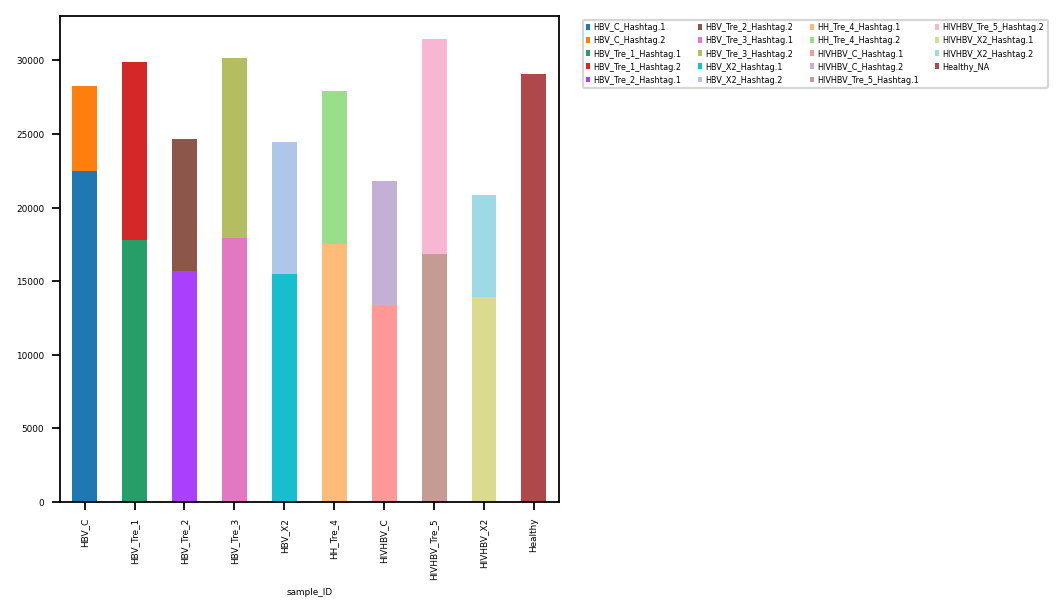

In [50]:
with plt.rc_context():
    sc.set_figure_params(scanpy=True, fontsize=4)
    pd.crosstab(adata_full.obs["sample_ID"], adata_full.obs["scanpy_index"]).plot(kind='bar', stacked=True)
    plt.legend(ncol=4, bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.grid(None)  
    plt.savefig(plot_dir+"QC_sample_composition.png", bbox_inches="tight", dpi=300)

plt.show()

with plt.rc_context():
    sc.set_figure_params(scanpy=True, fontsize=4)
    pd.crosstab(adata_full.obs["sample_ID"], adata_full.obs["solo_classification"]).plot(kind='bar', stacked=True)
    plt.legend(ncol=4, bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.grid(None)  
    plt.savefig(plot_dir+"QC_sample_doublet.png", bbox_inches="tight", dpi=300)

plt.show()

## Remove doublets

In [51]:
#adata_all = adata_all[adata_all.obs["solo_classification"] != "doublet"].copy()
##save for downstream
adata_all.write("/well/immune-rep/users/vbw431/Projects/Peppa/out/peppa_azi_combat.h5ad")
